# Project description

In this notebook, we visualise the data processed in the previous notebooks to put them together for publication. 

# Initialisation

In [2]:
import numpy as np
import scipy as sci
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pl

import scanpy as sc
import anndata as ann


from scipy.sparse import csr_matrix
from matplotlib import rcParams
from matplotlib import colors
from seaborn import heatmap
from matplotlib import gridspec

import os

sc.settings.verbosity = 3
sc.logging.print_versions()

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 8.0.1
anndata             0.7.4
appnope             0.1.0
backcall            0.2.0
cairo               1.20.0
cffi                1.14.3
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
igraph              0.8.3
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.2
joblib              0.17.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0
llvmlite            0.34.0
louvain             0.6.1
matplotlib          3.3.2
mpl_toolkits        NA
natsort             7.0.1
numba               0.51.2
numexpr             2.7.1
numpy               1.19.2
packaging           20.4
pandas              1.1.4
parso               0.7.0
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.8
ptyprocess          0.6.0
p

In [3]:
import matplotlib
matplotlib.__version__

'3.3.2'

In [4]:
import datetime

today = datetime.date.today().strftime('%y%m%d')

In [5]:
#%matplotlib inline
#%config InlineBackend.figure_format='retina' # mac

sc.settings.set_figure_params(dpi=70)
sc.settings.verbosity = 3
sc.settings.n_jobs = 3
data_dir = '/Users/maren.buettner/Documents/Collaborations/Engert_Schirge_IDR/data/'

In [6]:
sc.set_figure_params(vector_friendly=True,color_map='viridis',dpi_save=600,transparent=True)

In [7]:
sb.set_style('white')

Add my color scheme.

In [8]:
colors2 = pl.cm.RdYlBu_r(np.linspace(0, 1, 128))
colors3 = pl.cm.Greys_r(0.7)
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [9]:
colors_red = pl.cm.Reds_r(np.linspace(0, 0.8, 128))
myreds = colors.LinearSegmentedColormap.from_list('my_colormap', colors_red)

In [10]:
colors_red2 = pl.cm.Reds(np.linspace(0, 0.8, 128))
myreds2 = colors.LinearSegmentedColormap.from_list('my_colormap', colors_red2)

For the line plots, add color scheme.

In [10]:
add_colors = [keys for keys in matplotlib.colors.CSS4_COLORS.keys()]
cols=['red','blue','green','cyan','yellow','grey','orange','darkred','lightgreen',
      'darkviolet','sienna','peru','magenta','darkseagreen','palevioletred',
     'cornflowerblue','lightsalmon']
cols.extend(add_colors)

# Load dataset

Load batch corrected and annotated dataset with logCPM-normalized, but non-batch corrected values as `raw`.

In [11]:
adata = sc.read('./../data/data_annotated_dec20.h5ad')

/Users/maren.buettner/anaconda3/envs/scanpy1-6/lib/python3.8/site-packages/anndata/compat/__init__.py:158: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/maren.buettner/anaconda3/envs/scanpy1-6/lib/python3.8/site-packages/anndata/compat/__init__.py:158: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [12]:
adata

AnnData object with n_obs × n_vars = 9794 × 3000
    obs: 'batch', 'n_counts', 'n_genes', 'mt_fraction', 'S_score', 'G2M_score', 'phase', 'FVF', 'louvain', 'louvain_R', 'epiblast', 'endoderm', 'primitive_streak', 'extraembryonic_ecto', 'extraembryonic_endo', 'mesoderm', 'tissues', 'tissues_merge', 'endoderm_res', 'epiblast_res', 'tissues_primed', 'tissues_final', 'Foxa2_levels', 'tissue_Foxa2', 'FVF_Foxa2'
    uns: 'ADE_vs_TP', 'FVF_Foxa2_colors', 'FVF_colors', 'Foxa2_pEpi_vs_TP', 'Foxa2pos_vs_Foxa2neg_pEpi', 'batch_colors', 'dendrogram_endoderm_res', 'dendrogram_epiblast_res', 'dendrogram_louvain_R', 'dendrogram_tissues_final', 'dendrogram_tissues_primed', 'endoderm_res_colors', 'epiblast_res_colors', 'louvain', 'louvain_R_colors', 'louvain_colors', 'neighbors', 'pEpi_vs_TP', 'pca', 'rank_genes_groups', 'tissue_Foxa2_colors', 'tissues_colors', 'tissues_final_colors', 'tissues_merge_colors', 'tissues_primed_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'con

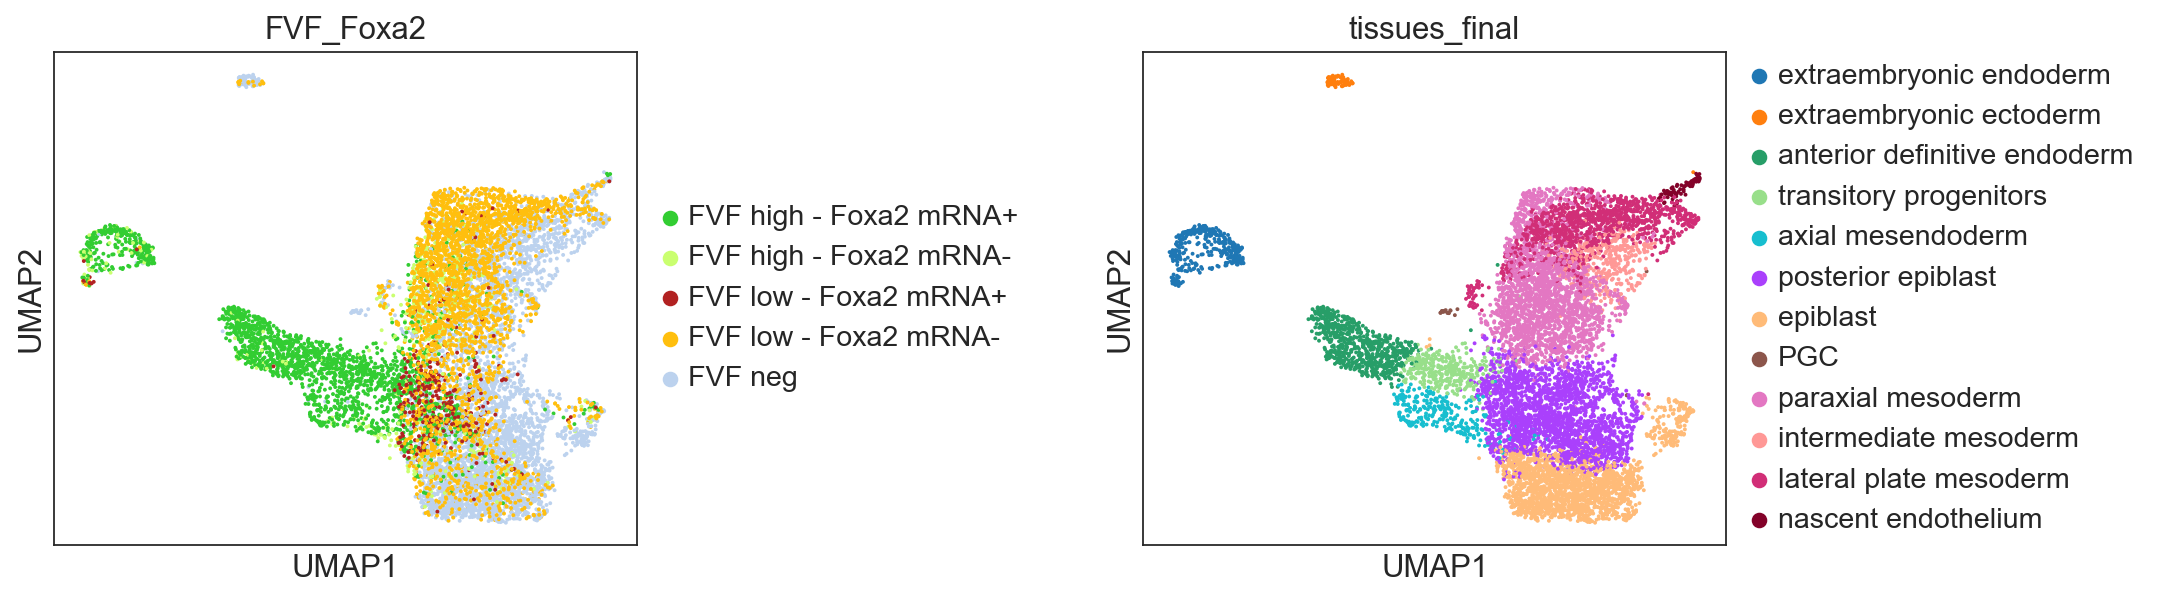

In [15]:
sc.pl.umap(adata, color=[ 'FVF_Foxa2','tissues_final'], wspace=0.7)

Load results of the differential expression test of posterior epiblast and epiblast for visualisation.

In [33]:
DE_genes_epi_pEpi = pd.read_csv("./../table/201203_gene_expression_decision_region.csv", index_col=0) 

In [34]:
DE_genes_epi_pEpi.head()

gene_ids  n_cells  highly_variable     means  dispersions  \
index                                                                          
Xkr4     ENSMUSG00000051951       57            False  0.004872     0.690311   
Sox17    ENSMUSG00000025902     1488             True  0.489130     1.541342   
Mrpl15   ENSMUSG00000033845     9713            False  2.306435     0.087948   
Lypla1   ENSMUSG00000025903     8279            False  1.060121     0.335781   
Gm37988  ENSMUSG00000104217       26            False  0.001943     0.628470   

         dispersions_norm  highly_variable_nbatches  \
index                                                 
Xkr4            -0.269835                         1   
Sox17           21.115414                         8   
Mrpl15           0.040912                         0   
Lypla1           0.583897                         2   
Gm37988         -0.181854                         1   

         highly_variable_intersection  anterior definitive endoderm_mean  \
index                                                                      
Xkr4                            False                           0.006192   
Sox17                            True                           2.694965   
Mrpl15                          False                           2.374410   
Lypla1                          False                           1.281326   
Gm37988                         False                           0.002784   

         anterior definitive endoderm_n_cells  ...  posterior epiblast_log2FC  \
index                                          ...                              
Xkr4                                        9  ...                        NaN   
Sox17                                     661  ...                        NaN   
Mrpl15                                    698  ...                  -0.192689   
Lypla1                                    656  ...                        NaN   
Gm37988                                     3  ...                        NaN   

         posterior epiblast_pvals_adj  Foxa2+ posterior epiblast_mean  \
index                                                                   
Xkr4                              NaN                        0.004700   
Sox17                             NaN                        0.080154   
Mrpl15                   3.096094e-20                        2.335275   
Lypla1                            NaN                        0.963799   
Gm37988                           NaN                        0.000940   

         Foxa2+ posterior epiblast_n_cells  Foxa2+ posterior epiblast_log2FC  \
index                                                                          
Xkr4                                     5                               NaN   
Sox17                                   75                         -2.744601   
Mrpl15                                 615                          0.247593   
Lypla1                                 526                               NaN   
Gm37988                                  1                               NaN   

         Foxa2+ posterior epiblast_pvals_adj  Foxa2- posterior epiblast_mean  \
index                                                                          
Xkr4                                     NaN                        0.007320   
Sox17                           4.579779e-29                        0.014068   
Mrpl15                          1.713187e-10                        2.392570   
Lypla1                                   NaN                        1.048680   
Gm37988                                  NaN                        0.001105   

         Foxa2- posterior epiblast_n_cells  Foxa2- posterior epiblast_log2FC  \
index                                                                          
Xkr4                                    17                               NaN   
Sox17                                   31                         -2.558412   
Mrpl15           

# Heatmaps

In this section, we plot heatmaps to visualise the characteristics of several populations.

## Figure 1 - characteristic genes in epiblast, endoderm and mesoderm

Create a new `obs` variable where mesoderm is annotated as one cluster.

In [13]:
adata.obs['tissue_Fig1'] = adata.obs['tissues_final'].cat.add_categories(['mesoderm'])

In [14]:
adata.obs['tissue_Fig1'][np.in1d(adata.obs['tissue_Fig1'], 
['paraxial mesoderm', 'intermediate mesoderm', 
 'lateral plate mesoderm', 'nascent endothelium'])] = 'mesoderm'
adata.obs['tissue_Fig1'] = adata.obs['tissue_Fig1'].cat.remove_unused_categories()

Reorder colors.

In [15]:
adata.uns['tissue_Fig1_colors'] = ['#1f77b4', '#ff7f0e', '#279e68', '#98df8a', 
                                   '#17becf', '#aa40fc', 
                                   '#ffbb78', '#8c564b', '#e377c2']

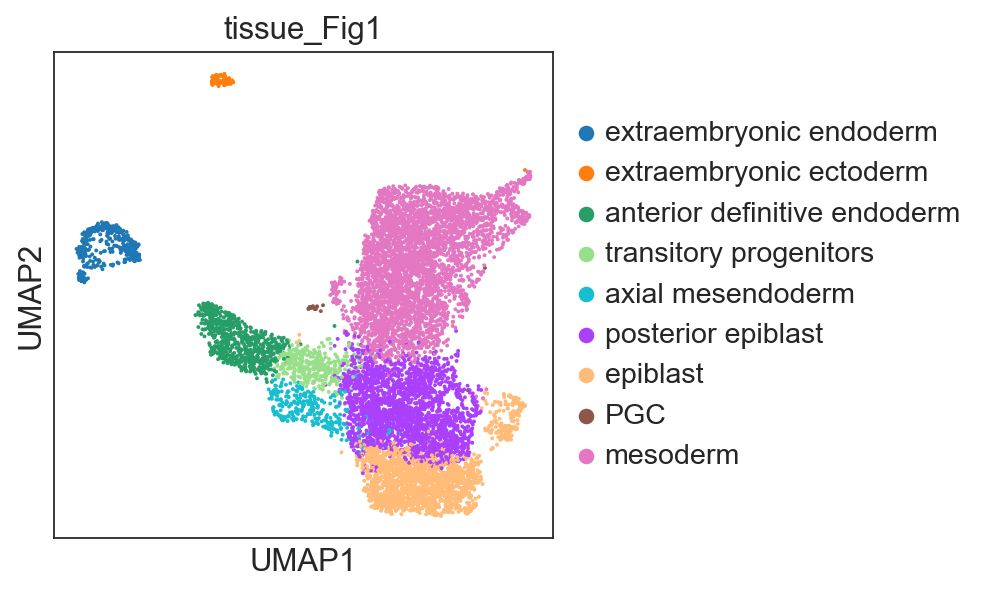

In [19]:
sc.pl.umap(adata, color='tissue_Fig1')

In [16]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['tissue_Fig1']=='epiblast')[0]
sc.tl.dpt(adata)
sc.tl.paga(adata, groups='tissue_Fig1')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9987524  0.99716485 0.99551666 0.99364066 0.98112035
     0.9771554  0.97513014 0.96936214 0.9627899  0.9606941  0.9571683
     0.9547255  0.95349175 0.95330375]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


Plot the characteristic genes for mesoderm, poterior epiblast, endoderm transition and ADE.

In [21]:
genes_oi = ['Foxa2', 'T', 'Sox17', 
            'Cer1','Hhex','Dkk1', #ADE genes
            #'Cdx1', 'Cdx2', #PDE genes
            'Snai1', 'Snai2', 'Twist1', 'Zeb1','Zeb2', 'Mesp1', 'Mesp2', #EMT genes
            'Ovol2', 'Elf3', #EMT inhibitors
            'Cdh1', 'Cdh2' #instead of Ecad, Ncad #cell adhesion
           ]

In [19]:
genes_oi_dict = {' ' : ['Foxa2', 'T', 'Sox17'], 
                 'ADE genes' : [ 'Cer1','Hhex','Dkk1'], #ADE genes
                 'EMT genes' : ['Snai1', 'Snai2', 'Twist1', 
                                'Zeb1','Zeb2', 'Mesp1', 'Mesp2'], #EMT genes
                 'EMT inhibitors' : ['Ovol2', 'Elf3'], #EMT inhibitors
                 'Cell adhesion' : ['Cdh1', 'Cdh2']} #instead of Ecad, Ncad #cell adhesion}

The following figure can only be created with the paga-path fix in `scanpy-testing`.

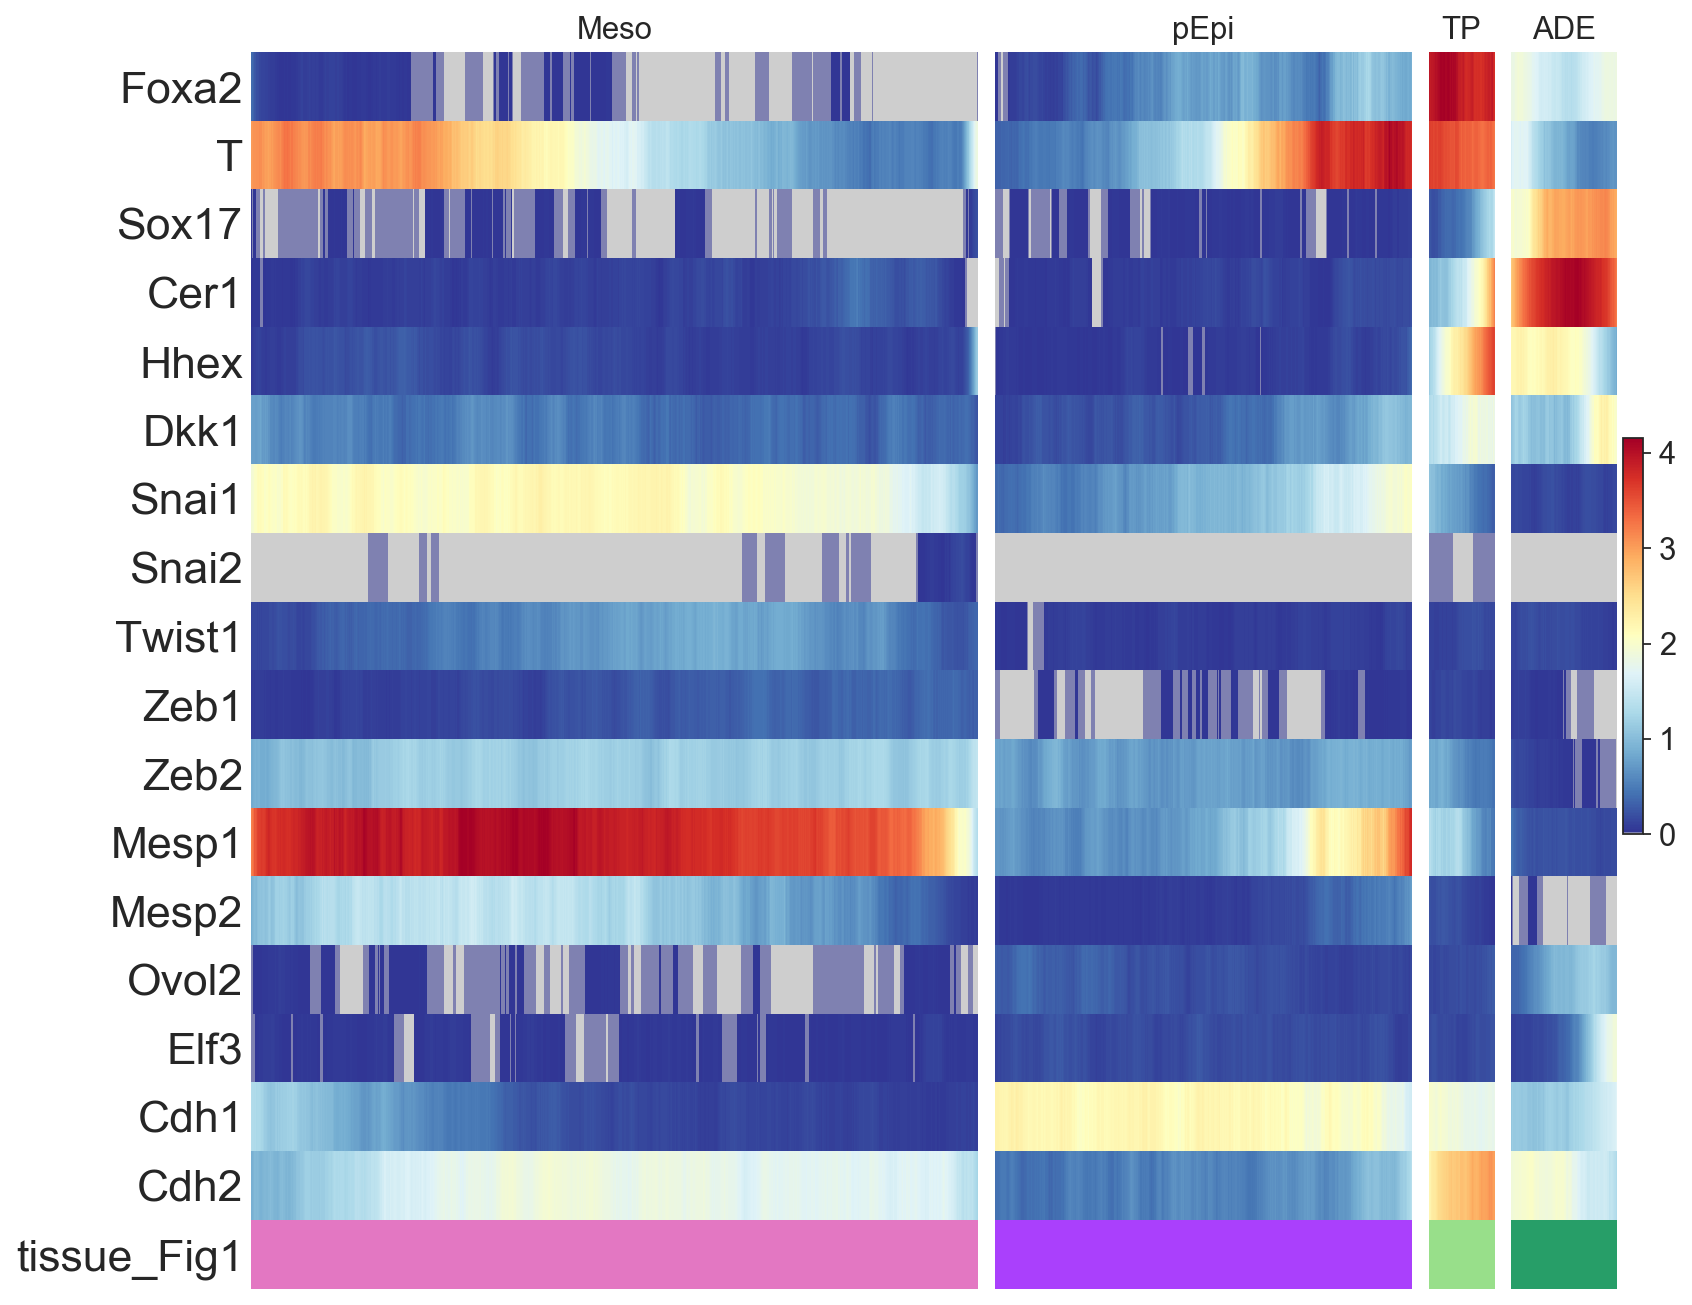

In [25]:

paths = [('Meso', ['mesoderm']),
        ('pEpi',['posterior epiblast']),
        ('TP',['transitory progenitors']),
        ('ADE',['anterior definitive endoderm']),      
    ]

path_ratios= pd.value_counts(adata.obs['tissue_Fig1']).values
path_cat = pd.value_counts(adata.obs['tissue_Fig1']).index
tmp=np.zeros(len(paths))
for ipath, (descr, path) in enumerate(paths):
    idx = np.flatnonzero(np.in1d(path_cat, path))
    tmp[ipath] = np.sum(path_ratios[idx]) #in case we use more than 
    
tmp = tmp.astype('int')
path_ratios = tmp / tmp.sum() *len(path_ratios)

_, axs = pl.subplots(ncols=len(tmp), figsize=(10, 10), 
                     gridspec_kw={'wspace': 0.05, 'left': 0.11,'width_ratios':path_ratios})
pl.subplots_adjust(left=0.05, right=0.98, top=0.88)
for ipath, (descr, path) in enumerate(paths):
    sc.pl.paga_path(adata, left_margin=0.3, ytick_fontsize=20, color_map=mymap,
                   nodes=path, ax=axs[ipath],
                   keys=genes_oi,
                   annotations=[],
                   color_maps_annotations={'FVF' : 'Greys'},
                   show_yticks=True if ipath==0 else False,
                   show_node_names = False,
                   show_colorbar=True if ipath==len(tmp)-1 else False,                        
                   n_avg=100,
                   normalize_to_zero_one = False,
                   title='{}'.format(descr),
                   show=False)
pl.savefig('./figures/' + today + '_heatmap_endoderm_mesoderm.pdf', dpi=150, bbox_inches='tight')
pl.show()

Plot some variations of the above figure.

In [20]:
adata_tmp = adata[np.in1d(adata.obs['tissue_Fig1'], ['mesoderm', 'axial mesendoderm', 'anterior definitive endoderm',
                                            'transitory progenitors', 'posterior epiblast'
                                            ])].copy()
adata_tmp.obs['tissues_final'] = adata_tmp.obs['tissues_final'].cat.reorder_categories([
     'paraxial mesoderm', 'intermediate mesoderm', 'lateral plate mesoderm','nascent endothelium',
        'axial mesendoderm',
        'posterior epiblast','transitory progenitors','anterior definitive endoderm'
    ])

/Users/maren.buettner/anaconda3/envs/scanpy1-6/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


The following figure can only be created in `scanpy 1.6` and reproduces `Figure 1j`.

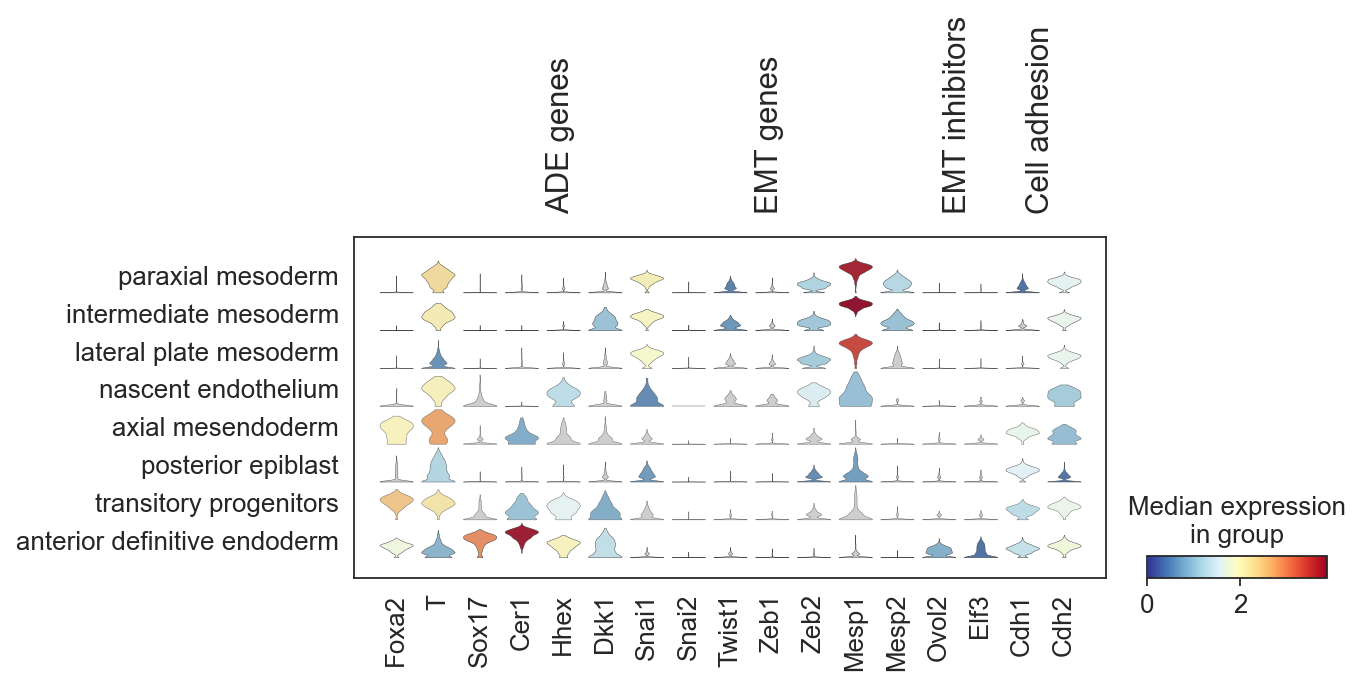

In [25]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', var_names=genes_oi_dict, cmap=mymap,
             save =  today + '_endoderm_mesoderm2.pdf'
             )

## Figure 3: Wnt pathway in epiblast, endoderm and mesoderm

Define genes of interest for the Wnt pathway.

In [19]:
genes_wnt = ['Wnt3', 'Wnt3a', 'Rspo3', #Ligand/Receptors
            'Axin2', 'Lgr5', 'Lef1',  #Wnt Targets
             'Cer1', 'Dkk1', 'Shisa2', 'Sfrp1', 'Sfrp5',  #Inhibitors
            ]

In [27]:
genes_wnt_dict = {'Ligand/Receptors':['Wnt3', 'Wnt3a',
                                       'Rspo3'], #Ligand/Receptors
             'Wnt Targets': ['Axin2', 'Lgr5', 'Lef1', 'T'], #Wnt Targets
             'Wnt Inhibitors' : ['Cer1', 'Dkk1', 'Shisa2', 'Sfrp1', 'Sfrp5'] #Inhibitors
                 }

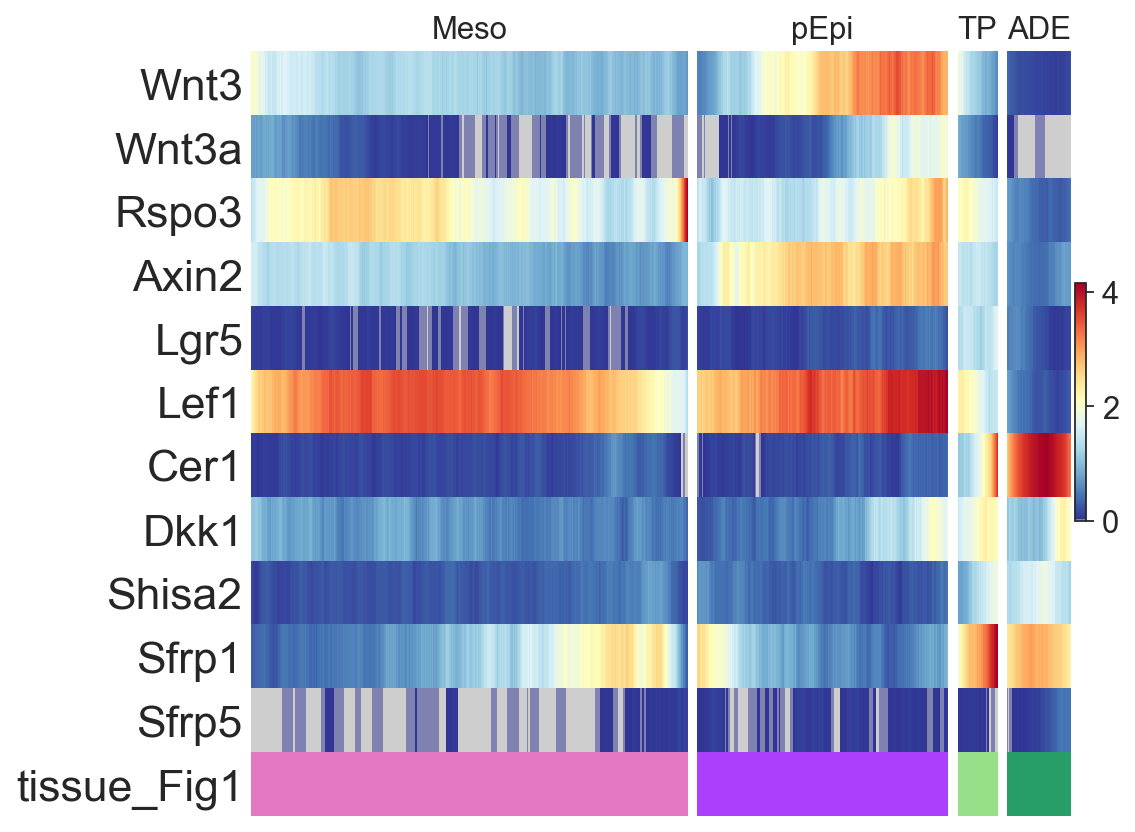

In [30]:

paths = [('Meso', ['mesoderm']),
         #('AM', ['axial mesendoderm']),
        ('pEpi',['posterior epiblast']),
        ('TP',['transitory progenitors']),
        ('ADE',['anterior definitive endoderm']),      
    ]

path_ratios= pd.value_counts(adata.obs['tissue_Fig1']).values
path_cat = pd.value_counts(adata.obs['tissue_Fig1']).index
tmp=np.zeros(len(paths))
for ipath, (descr, path) in enumerate(paths):
    idx = np.flatnonzero(np.in1d(path_cat, path))
    tmp[ipath] = np.sum(path_ratios[idx]) #in case we use more than 
    
tmp = tmp.astype('int')
path_ratios = tmp / tmp.sum() *len(path_ratios)

_, axs = pl.subplots(ncols=len(tmp), figsize=(6, 6), 
                     gridspec_kw={'wspace': 0.05, 'left': 0.11,'width_ratios':path_ratios})
pl.subplots_adjust(left=0.05, right=0.98, top=0.88)
for ipath, (descr, path) in enumerate(paths):
    sc.pl.paga_path(adata, left_margin=0.3, ytick_fontsize=20, color_map=mymap,
                   nodes=path, ax=axs[ipath],
                   keys=genes_wnt,
                   annotations=[],
                   color_maps_annotations={'FVF' : 'Greys'},
                   show_yticks=True if ipath==0 else False,
                   show_node_names = False,
                   show_colorbar=True if ipath==len(tmp)-1 else False,                        
                   n_avg=100,
                   normalize_to_zero_one = False,
                   title='{}'.format(descr),
                   show=False)
pl.savefig('./figures/' + today + '_heatmap_wnt.pdf', dpi=150, bbox_inches='tight')
pl.show()

Scale the data and replot:

In [24]:
adata2 = ann.AnnData(X = adata.raw.X, var= adata.raw.var, obs= adata.obs, uns=adata.uns,
                     obsm = adata.obsm)
adata2.var['max_gene'] = adata2.X.todense().max(axis=0).A1
adata2.X= np.matmul(adata2.X.todense(), np.diag(1/adata2.var['max_gene']))
adata2.obs['tissue_Fig1'] = adata.obs['tissue_Fig1']

In [25]:
adata2.uns['iroot'] = np.flatnonzero(adata2.obs['tissue_Fig1']=='epiblast')[0]
sc.tl.dpt(adata2)
sc.tl.paga(adata2, groups='tissue_Fig1')

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


In [26]:
adata2.uns['tissue_Fig1_colors'] = adata.uns['tissue_Fig1_colors']

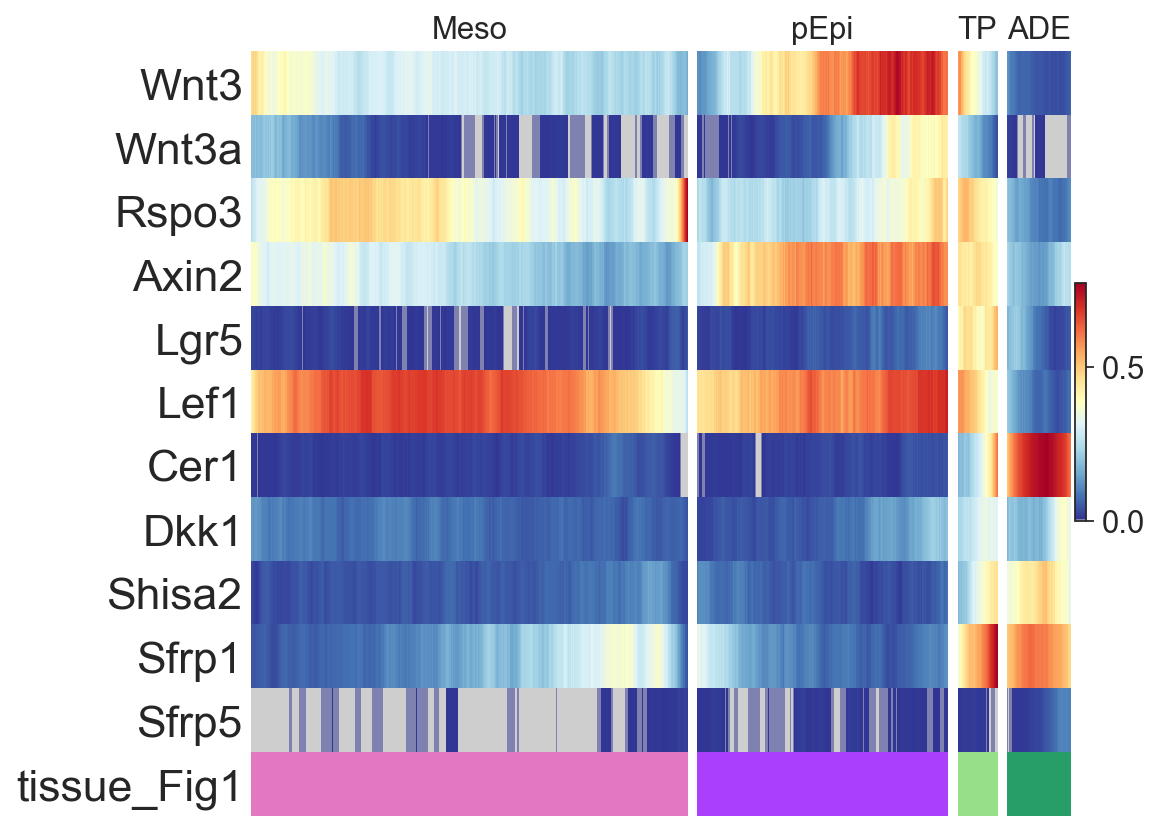

In [34]:

paths = [('Meso', ['mesoderm']),
         #('AM', ['axial mesendoderm']),
        ('pEpi',['posterior epiblast']),
        ('TP',['transitory progenitors']),
        ('ADE',['anterior definitive endoderm']),      
    ]

path_ratios= pd.value_counts(adata.obs['tissue_Fig1']).values
path_cat = pd.value_counts(adata.obs['tissue_Fig1']).index
tmp=np.zeros(len(paths))
for ipath, (descr, path) in enumerate(paths):
    idx = np.flatnonzero(np.in1d(path_cat, path))
    tmp[ipath] = np.sum(path_ratios[idx]) #in case we use more than 
    
tmp = tmp.astype('int')
path_ratios = tmp / tmp.sum() *len(path_ratios)

_, axs = pl.subplots(ncols=len(tmp), figsize=(6, 6), 
                     gridspec_kw={'wspace': 0.05, 'left': 0.11,'width_ratios':path_ratios})
pl.subplots_adjust(left=0.05, right=0.98, top=0.88)
for ipath, (descr, path) in enumerate(paths):
    sc.pl.paga_path(adata2, left_margin=0.3, ytick_fontsize=20, color_map=mymap,
                   nodes=path, ax=axs[ipath],
                   keys=genes_wnt,
                   annotations=[],
                   color_maps_annotations={'FVF' : 'Greys'},
                   show_yticks=True if ipath==0 else False,
                   show_node_names = False,
                   show_colorbar=True if ipath==len(tmp)-1 else False,                        
                   n_avg=100,
                   normalize_to_zero_one = False,
                   title='{}'.format(descr),
                   show=False)
pl.savefig('./figures/' + today + '_heatmap_scaled_wnt.pdf', dpi=150, bbox_inches='tight')
pl.show()

The following figure can only be created in scanpy 1.6:

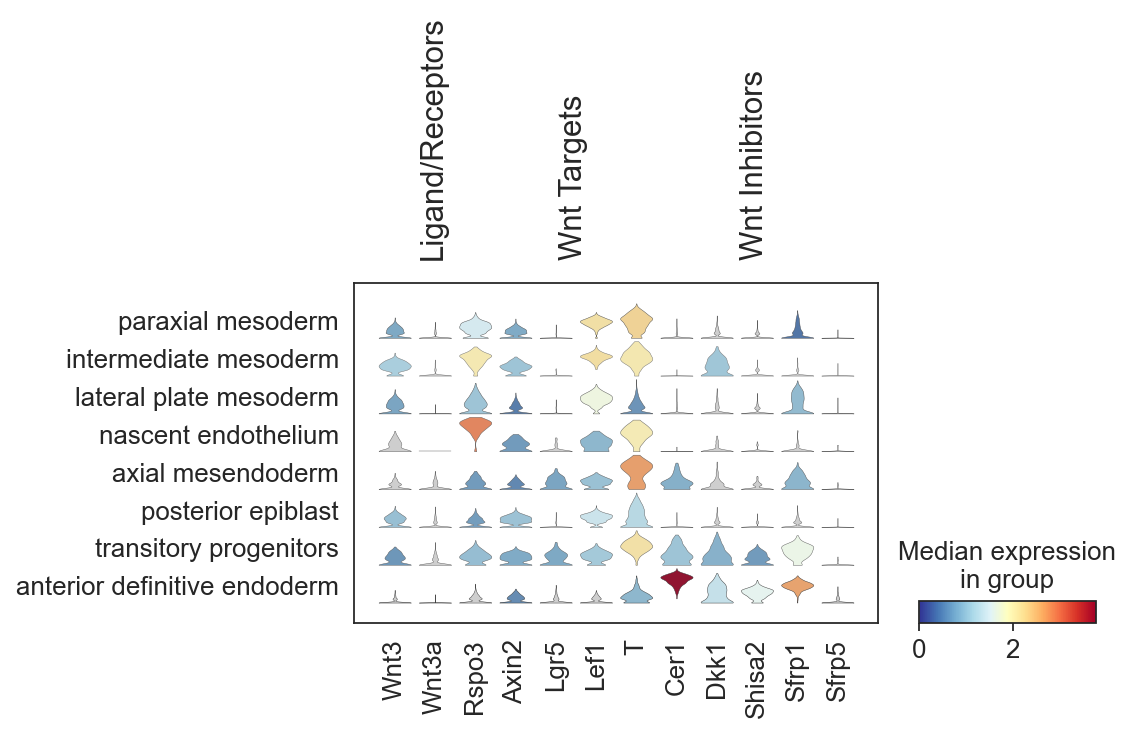

In [28]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', var_names=genes_wnt_dict, cmap=mymap, 
             save = '_' + today + '_Wnt.pdf'
             )

### Transition of Foxa2+ posterior epiblast to endoderm transition

In [17]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['tissue_Foxa2']=='Foxa2+ posterior epiblast')[0]
sc.tl.dpt(adata)
sc.tl.paga(adata, groups='tissue_Foxa2')

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


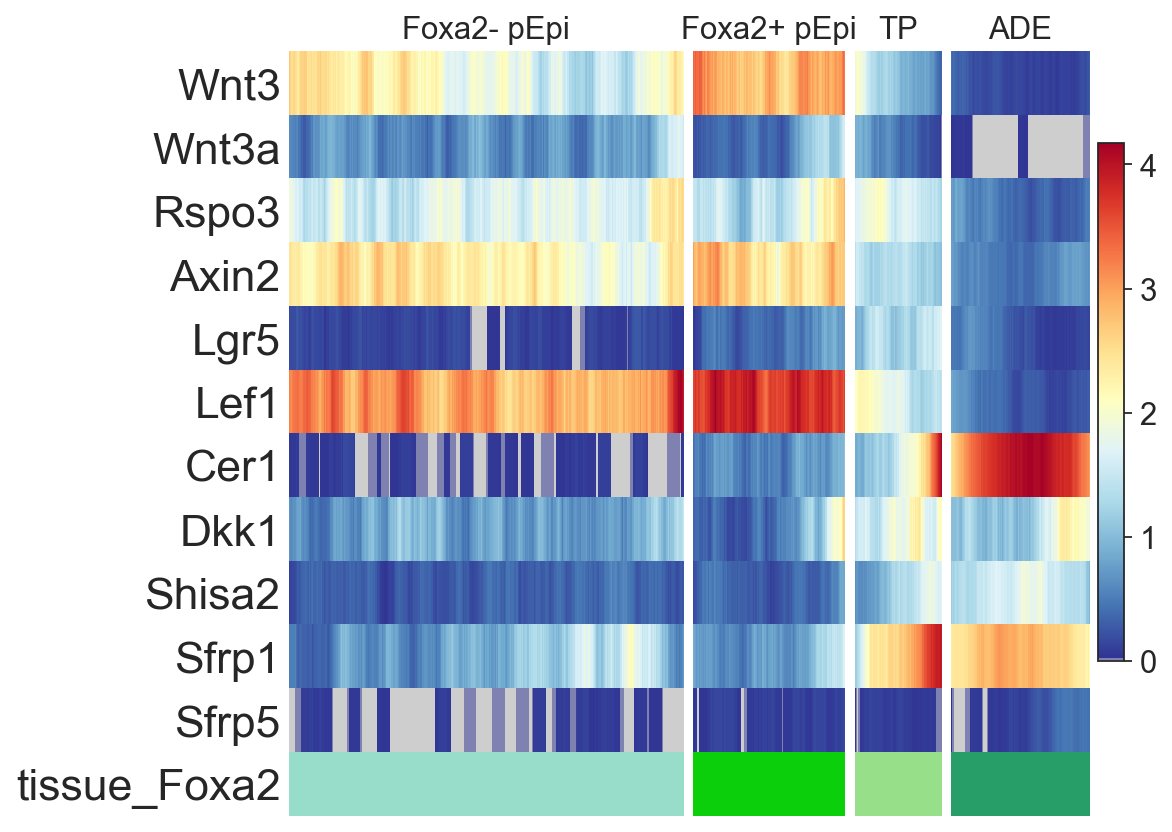

In [20]:

paths = [('Foxa2- pEpi',['Foxa2- posterior epiblast']),
        ('Foxa2+ pEpi',['Foxa2+ posterior epiblast']),
        ('TP',['transitory progenitors']),
        ('ADE',['anterior definitive endoderm']),
        #('AM', ['axial mesoderm']),
    ]

path_ratios= pd.value_counts(adata.obs['tissue_Foxa2']).values
path_cat = pd.value_counts(adata.obs['tissue_Foxa2']).index
tmp=np.zeros(len(paths))
for ipath, (descr, path) in enumerate(paths):
    #print(path[1])
    idx = np.flatnonzero(np.in1d(path_cat, path))
    #print(idx)
    tmp[ipath] = np.sum(path_ratios[idx])
    
tmp = tmp.astype('int')
path_ratios = tmp / tmp.sum() *len(path_ratios)

_, axs = pl.subplots(ncols=len(tmp), figsize=(6,6), 
                     gridspec_kw={'wspace': 0.05, 'left': 0.11,'width_ratios':path_ratios})
pl.subplots_adjust(left=0.05, right=0.98, top=0.88)
for ipath, (descr, path) in enumerate(paths):
    sc.pl.paga_path(adata, left_margin=0.3, ytick_fontsize=20, color_map=mymap,
                   nodes=path, ax=axs[ipath],
                   keys=genes_wnt,
                   annotations=[],
                   color_maps_annotations={'FVF' : 'Greys'},
                   show_yticks=True if ipath==0 else False,
                   show_node_names = False,
                   show_colorbar=True if ipath==len(tmp)-1 else False,                        
                   n_avg=50,
                   normalize_to_zero_one = False,
                   title='{}'.format(descr),
                   show=False)
pl.savefig('./figures/' + today + '_heatmap_Wnt_restricted2.pdf', dpi=150)
pl.show()

## Figure 4 - Delamination

In [21]:
genes_delam =['Ezr', 'Slc9a3r1', 'Scrib', 'Crb3', 'Pard6b', 'Snai1', 'Cdh2', #N-cad, 
'Cdh1', #E-cad, 
'Flrt3', 'Cldn6', 'Cldn7', 'Tjp2', 'Tjp3', 'Marveld2', 'Krt7', 'Krt8', 'Krt18', 
'Lamc1', 'Lamb1', 'Col4a1', 'Col4a2', 'Mmp14', 'Adam19', 'Adamts9']
             
    
genes_delam2 =['Ezr', 'Slc9a3r1', 'Scrib', 'Crb3', 'Pard6b', 'Snai1', 'Cdh2', #N-cad, 
'Cdh1', #E-cad, 
'Flrt3', 'Cldn6', 'Cldn7', 'Krt7', 'Krt8', 'Krt18', 
'Lamc1', 'Lamb1', 'Col4a1', 'Col4a2', 'Mmp14', 'Adam19', 'Adamts9']

In [22]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['tissue_Fig1']=='epiblast')[0]
sc.tl.dpt(adata)
sc.tl.paga(adata, groups='tissue_Fig1')

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


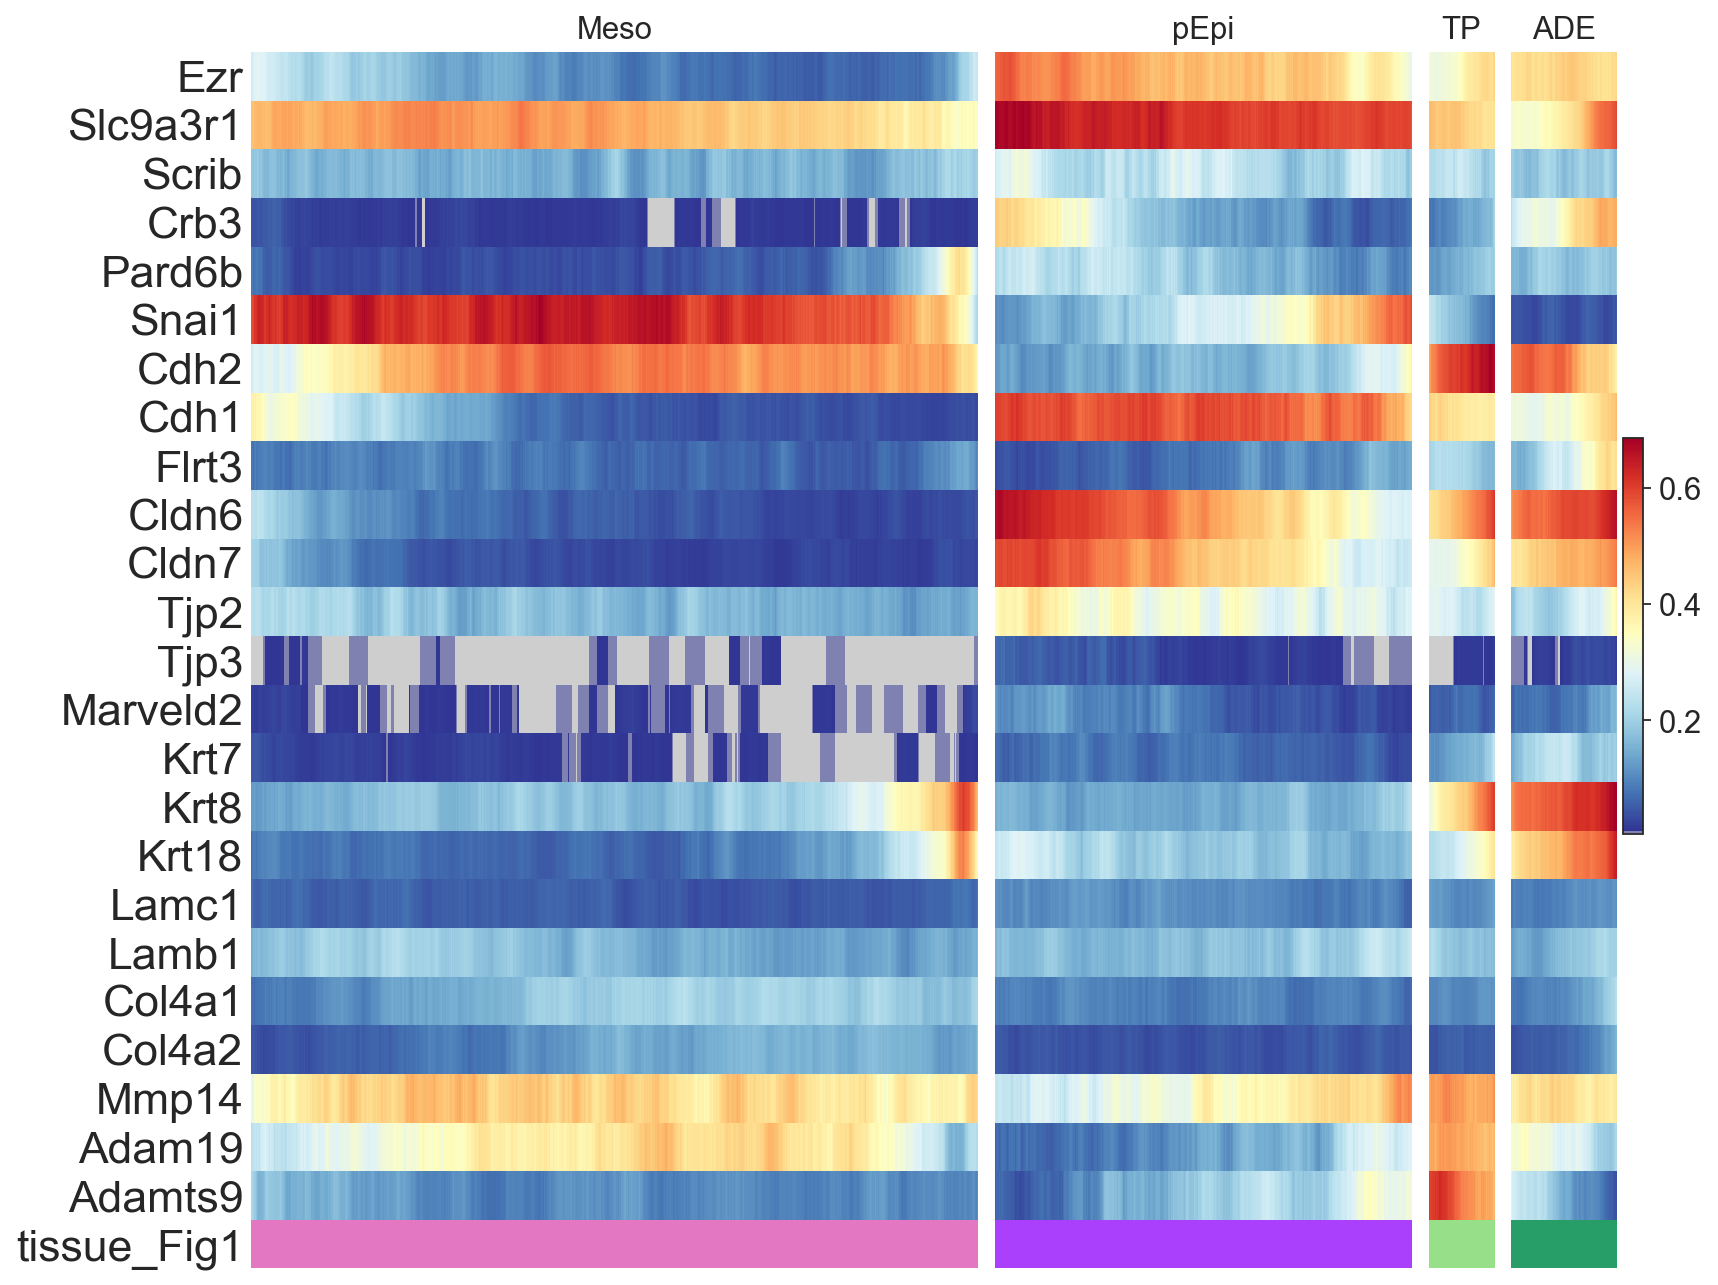

In [41]:

paths = [('Meso', ['mesoderm']),
         #('AM', ['axial mesendoderm']),
        ('pEpi',['posterior epiblast']),
        ('TP',['transitory progenitors']),
        ('ADE',['anterior definitive endoderm']),      
    ]

path_ratios= pd.value_counts(adata.obs['tissue_Fig1']).values
path_cat = pd.value_counts(adata.obs['tissue_Fig1']).index
tmp=np.zeros(len(paths))
for ipath, (descr, path) in enumerate(paths):
    idx = np.flatnonzero(np.in1d(path_cat, path))
    tmp[ipath] = np.sum(path_ratios[idx]) #in case we use more than 
    
tmp = tmp.astype('int')
path_ratios = tmp / tmp.sum() *len(path_ratios)

_, axs = pl.subplots(ncols=len(tmp), figsize=(10, 10), 
                     gridspec_kw={'wspace': 0.05, 'left': 0.11,'width_ratios':path_ratios})
pl.subplots_adjust(left=0.05, right=0.98, top=0.88)
for ipath, (descr, path) in enumerate(paths):
    sc.pl.paga_path(adata2, left_margin=0.3, ytick_fontsize=20, color_map=mymap,
                   nodes=path, ax=axs[ipath],
                   keys=genes_delam,
                   annotations=[],
                   color_maps_annotations={'FVF' : 'Greys'},
                   show_yticks=True if ipath==0 else False,
                   show_node_names = False,
                   show_colorbar=True if ipath==len(tmp)-1 else False,                        
                   n_avg=100,
                   normalize_to_zero_one = False,
                   title='{}'.format(descr),
                   show=False)
pl.savefig('./figures/' + today + '_heatmap_scaled_delamination.pdf', dpi=150, bbox_inches='tight')
pl.show()

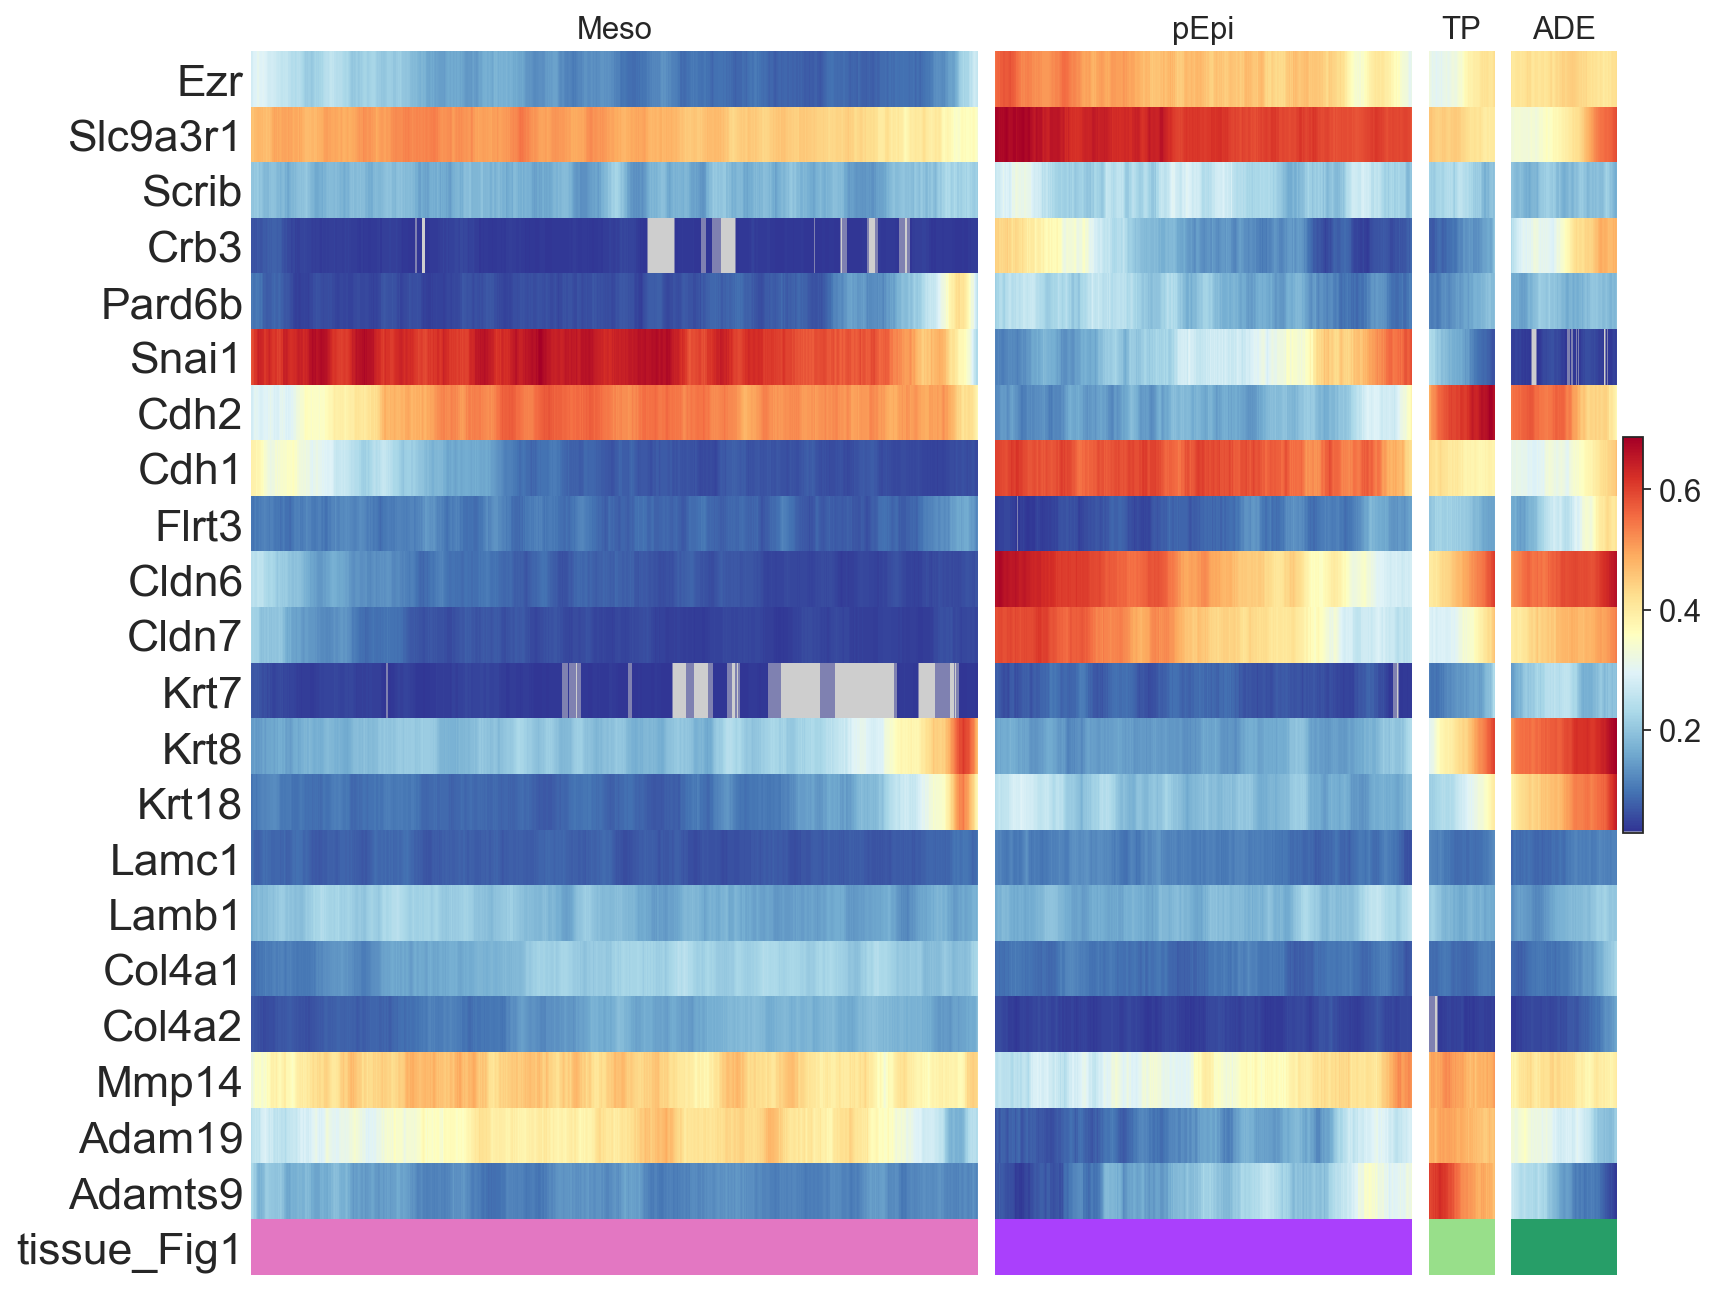

In [27]:

paths = [('Meso', ['mesoderm']),
         #('AM', ['axial mesendoderm']),
        ('pEpi',['posterior epiblast']),
        ('TP',['transitory progenitors']),
        ('ADE',['anterior definitive endoderm']),      
    ]

path_ratios= pd.value_counts(adata.obs['tissue_Fig1']).values
path_cat = pd.value_counts(adata.obs['tissue_Fig1']).index
tmp=np.zeros(len(paths))
for ipath, (descr, path) in enumerate(paths):
    idx = np.flatnonzero(np.in1d(path_cat, path))
    tmp[ipath] = np.sum(path_ratios[idx]) #in case we use more than 
    
tmp = tmp.astype('int')
path_ratios = tmp / tmp.sum() *len(path_ratios)

_, axs = pl.subplots(ncols=len(tmp), figsize=(10, 10), 
                     gridspec_kw={'wspace': 0.05, 'left': 0.11,'width_ratios':path_ratios})
pl.subplots_adjust(left=0.05, right=0.98, top=0.88)
for ipath, (descr, path) in enumerate(paths):
    sc.pl.paga_path(adata2, left_margin=0.3, ytick_fontsize=20, color_map=mymap,
                   nodes=path, ax=axs[ipath],
                   keys=genes_delam2,
                   annotations=[],
                   color_maps_annotations={'FVF' : 'Greys'},
                   show_yticks=True if ipath==0 else False,
                   show_node_names = False,
                   show_colorbar=True if ipath==len(tmp)-1 else False,                        
                   n_avg=100,
                   normalize_to_zero_one = False,
                   title='{}'.format(descr),
                   show=False)
pl.savefig('./figures/' + today + '_heatmap_scaled_delamination2.pdf', dpi=150, bbox_inches='tight')
pl.show()

## Extended Data Figure 8 - posterior epiblast vs epiblast

We first plot the top 100 differentially expressed genes for both posterior epiblast and epiblast as violin plot. Then, we visualise a selection of these genes.

In [28]:
adata_tmp = adata[np.in1d(adata.obs['tissues_final'], ['posterior epiblast', 'epiblast'])].copy()

/Users/maren.buettner/anaconda3/envs/scanpy1-6/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [35]:
low_epi_genes = DE_genes_epi_pEpi.loc[DE_genes_epi_pEpi['posterior epiblast_log2FC']<0].sort_values(
    'posterior epiblast_log2FC', 
    ascending=True).index[:100]
high_epi_genes = DE_genes_epi_pEpi.loc[DE_genes_epi_pEpi['posterior epiblast_log2FC']>0].sort_values(
    'posterior epiblast_log2FC', 
    ascending=False).index[:100]

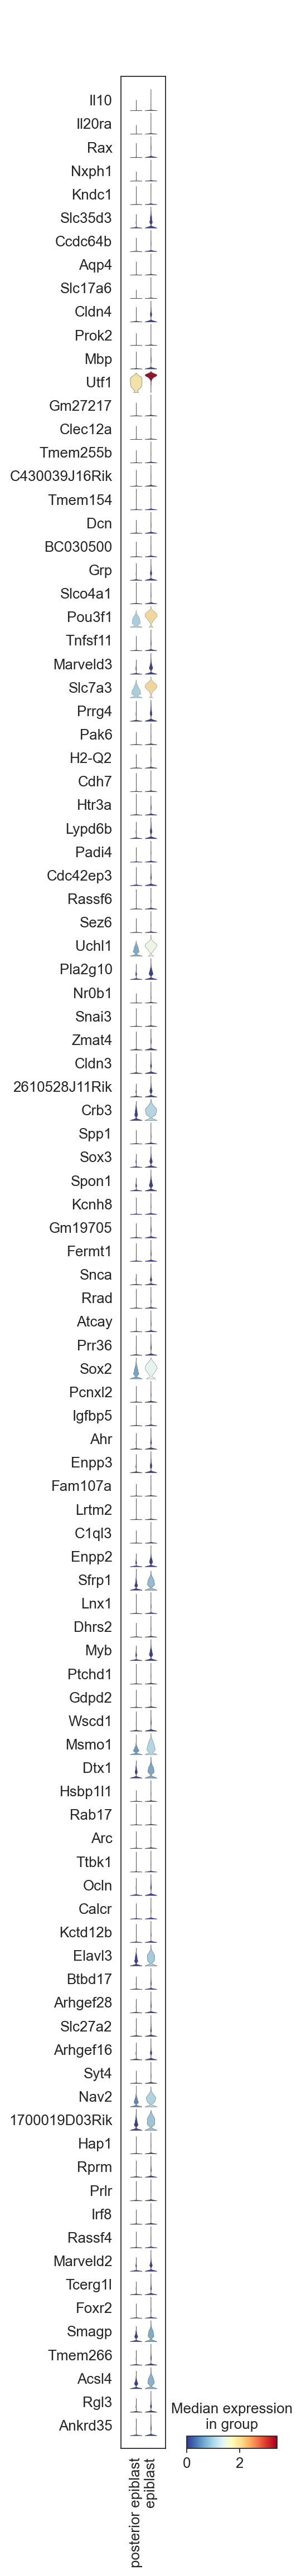

In [36]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=low_epi_genes, swap_axes=True, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_selected_DE_genes_epi_vs_pEpi_high_in_epi.pdf'
                    )

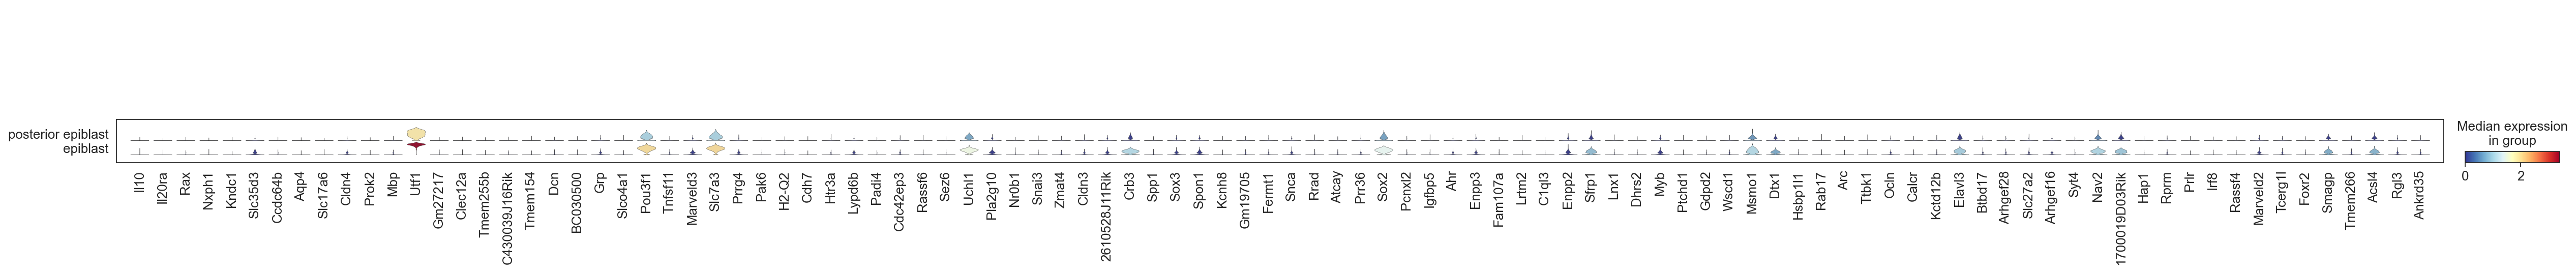

In [37]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=low_epi_genes, swap_axes=False, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_selected_DE_genes_epi_vs_pEpi_high_in_epi2.pdf'
                    )

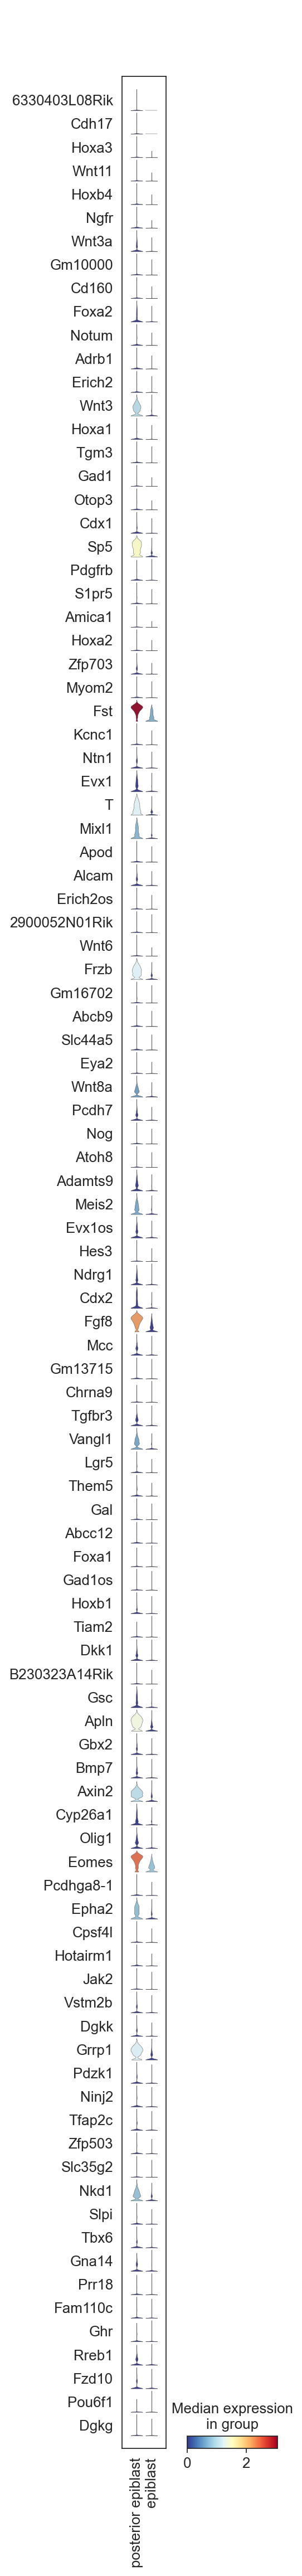

In [38]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=high_epi_genes, swap_axes=True, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_DE_genes_epi_vs_pEpi_high_in_pEpi.pdf'
                    )

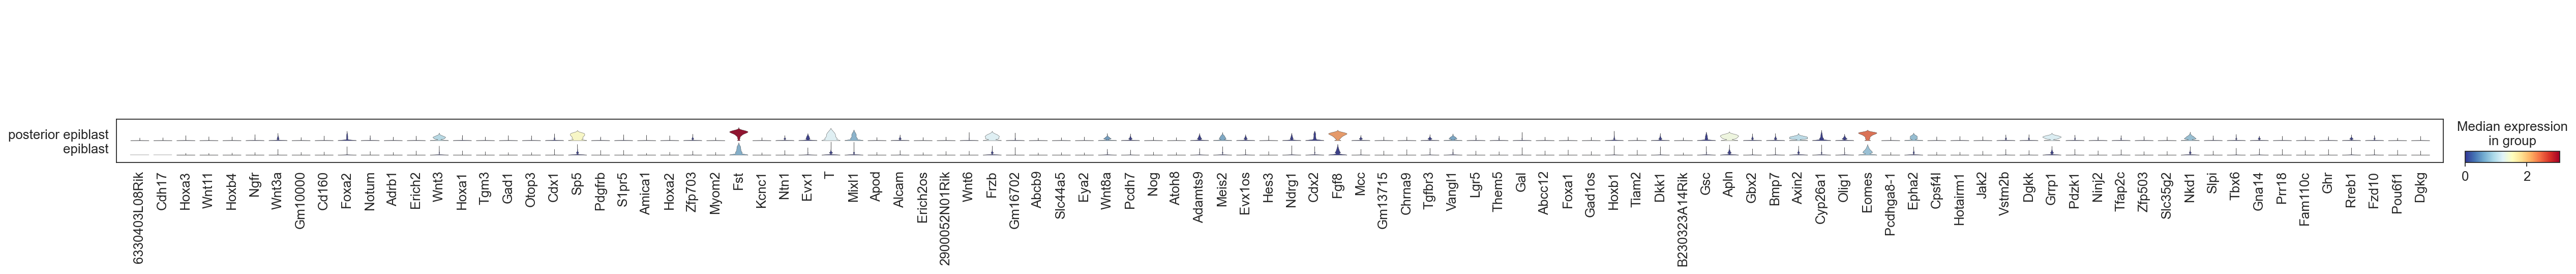

In [39]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=high_epi_genes, swap_axes=False, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_DE_genes_epi_vs_pEpi_high_in_pEpi2.pdf'
                    )

Here's a selection of interesting genes to show for epiblast and posterior epiblast.

In [40]:
genes_pEpi = ['Wnt3','Wnt3a', 'Wnt8a','Frzb','Sp5','Foxa2','T','Mixl1','Eomes','Fst','Fgf8','Cdx2',
             'Tgfbr3','Gsc','Evx1','Meis2','Adamts9']
genes_epi = ['Utf1','Sox2','Cldn3','Cldn4','Sfrp1','Crb3','Marveld3','Marveld2','Ocln','Spon1','Smagp']

Plot the marker genes for the comparison of posterior epiblast and epiblast as violin plots.

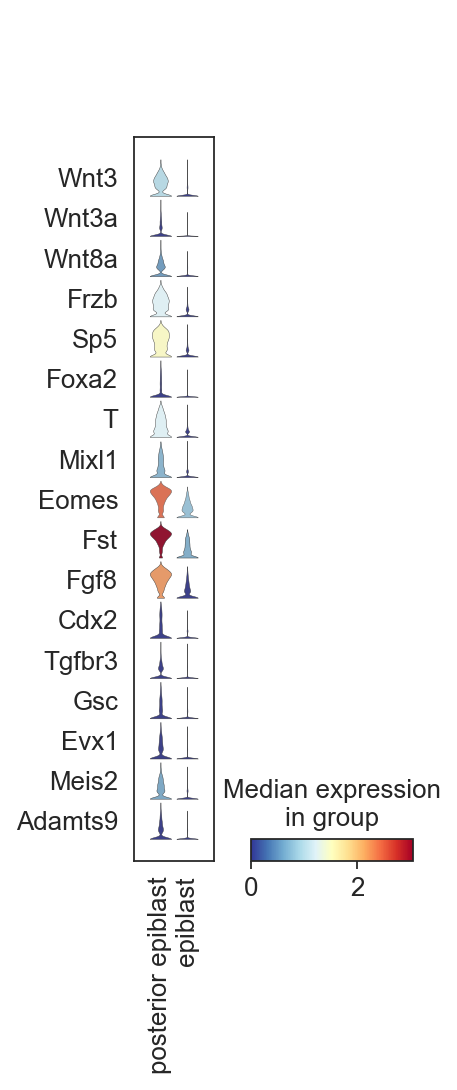

In [41]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=genes_pEpi, swap_axes=True, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_selected_DE_genes_epi_vs_pEpi_high_in_pEpi.pdf'
                    )

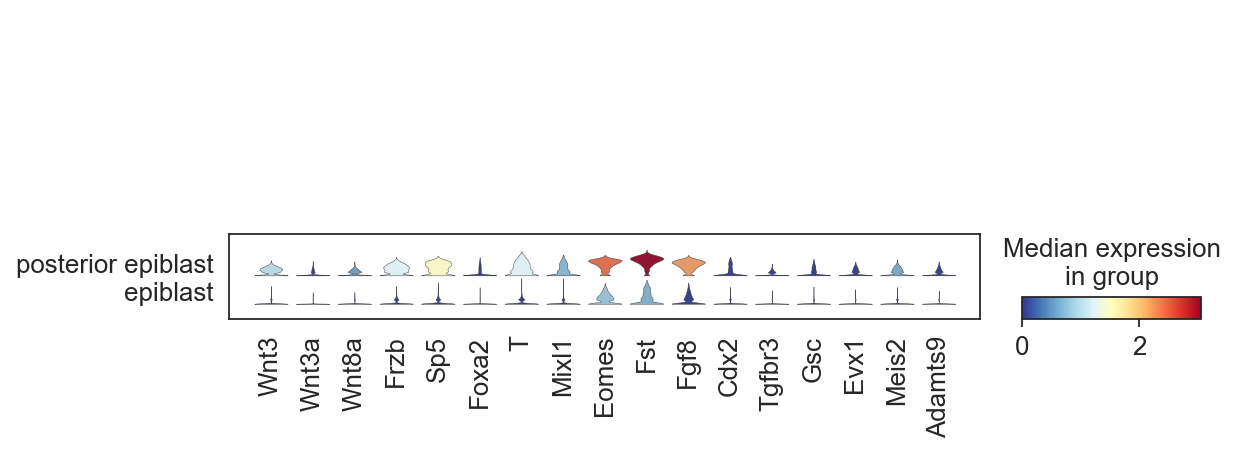

In [42]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=genes_pEpi, swap_axes=False, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_selected_DE_genes_epi_vs_pEpi_high_in_pEpi2.pdf'
                    )

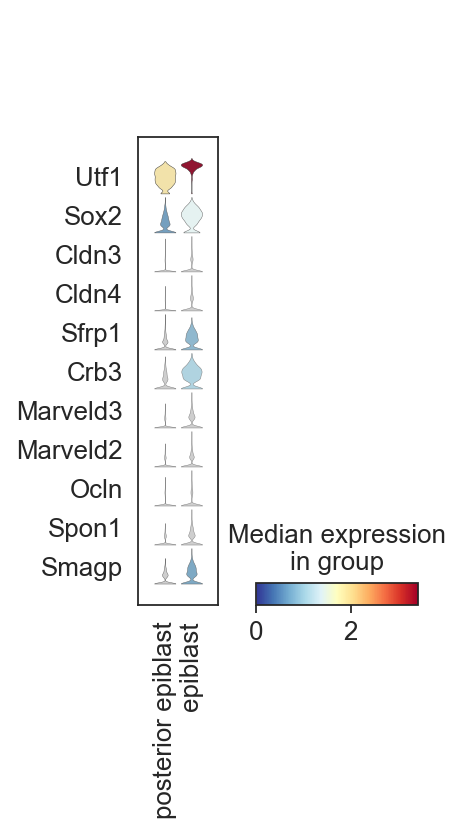

In [43]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=genes_epi, swap_axes=True, vmin=0, 
                     #vmax=0.11, 
                     cmap=mymap,
                     save=today + '_selected_DE_genes_epi_vs_pEpi_high_in_epi.pdf'
                    )

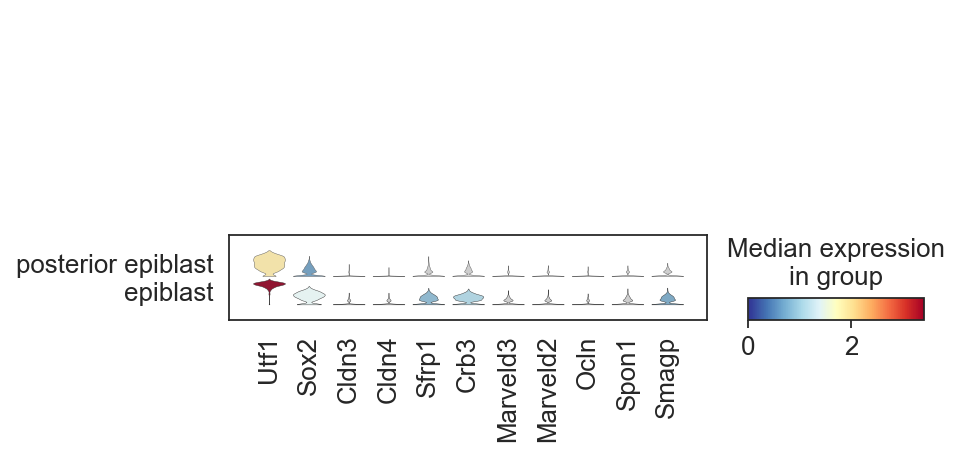

In [44]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=genes_epi, swap_axes=False, vmin=0, 
                     #vmax=0.11, 
                     cmap=mymap,
                     save=today + '_selected_DE_genes_epi_vs_pEpi_high_in_epi2.pdf'
                    )

Here's a second selection of interesting genes to show for epiblast and posterior epiblast.

In [33]:
#genes_compare = ['Wnt3','Wnt3a', 'Wnt8a','Frzb','Sp5','Foxa2','T','Mixl1','Eomes','Fst','Fgf8','Cdx2',
#             'Tgfbr3','Gsc','Evx1','Meis2','Adamts9']
genes_compare = [#'Cldn3','Cldn4',
                 'Cldn6','Cldn7', #'Cdh1',#'Tjp2', 'Tjp3','Ocln','Marveld2','Marveld3',
                 'Ezr', 'Slc9a3r1', #'Scrib', 
    'Crb3', 'Pard6b', 
                  'Adamts9','Adam19', 'Mmp14', 
                # 'Lamc1', 'Lamb1', 'Col4a1', 'Col4a2'
]

Plot the marker genes for the comparison of posterior epiblast and epiblast as violin plots.

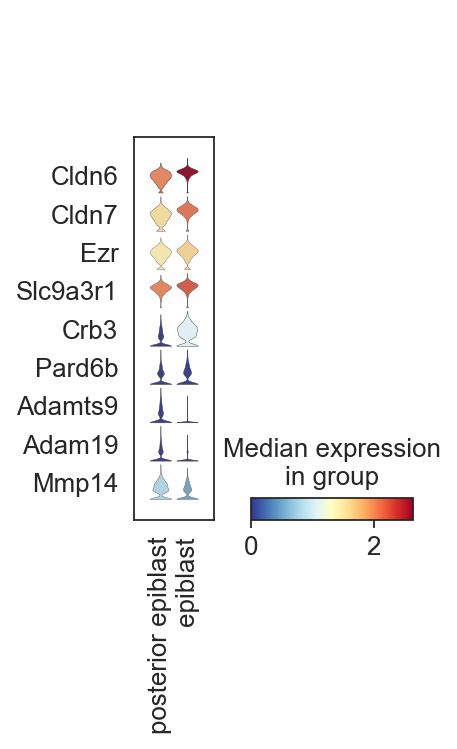

In [34]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=genes_compare, swap_axes=True, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_pathway_genes_epi_vs_pEpi_high_in_pEpi_wo_Cdh1.pdf'
                    )

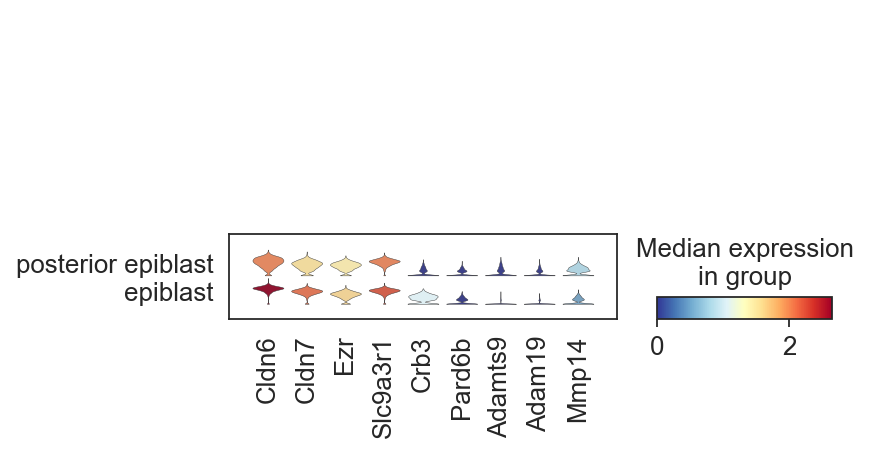

In [35]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=genes_compare, swap_axes=False, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_pathway_genes_epi_vs_pEpi_high_in_pEpi2_woCdh1.pdf'
                    )

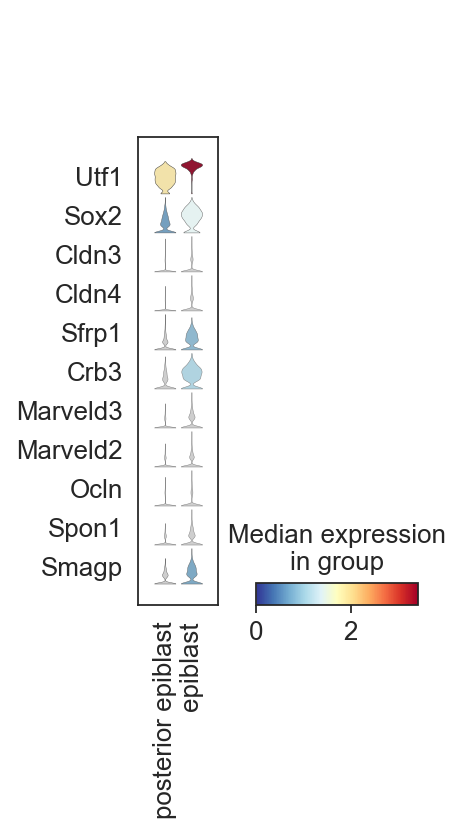

In [43]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=genes_epi, swap_axes=True, vmin=0, 
                     #vmax=0.11, 
                     cmap=mymap,
                     save=today + '_selected_DE_genes_epi_vs_pEpi_high_in_epi.pdf'
                    )

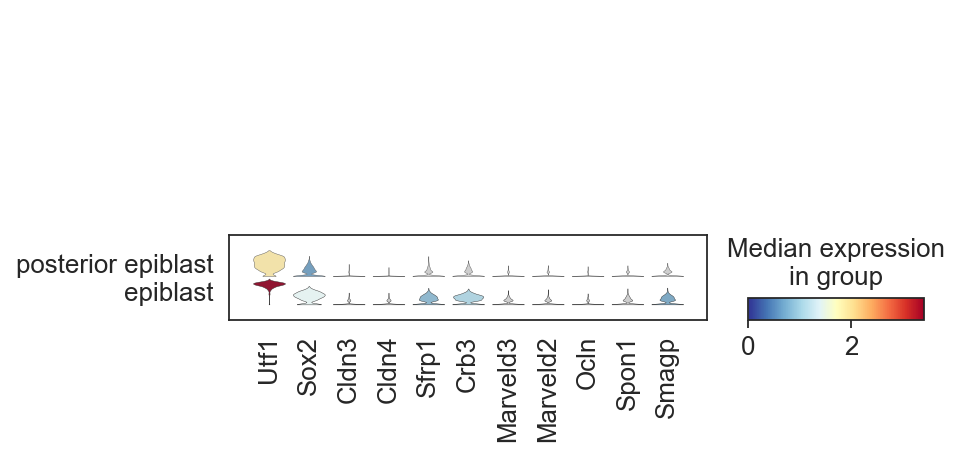

In [44]:
sc.pl.stacked_violin(adata_tmp, groupby='tissues_final', 
                     var_names=genes_epi, swap_axes=False, vmin=0, 
                     #vmax=0.11, 
                     cmap=mymap,
                     save=today + '_selected_DE_genes_epi_vs_pEpi_high_in_epi2.pdf'
                    )

Comment: Visualisation as heatmap is outdated, but we keep the code for compatibility reasons.

In [44]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['tissue_Fig1']=='epiblast')[4]
sc.tl.dpt(adata)
sc.tl.paga(adata, groups='tissue_Fig1')

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


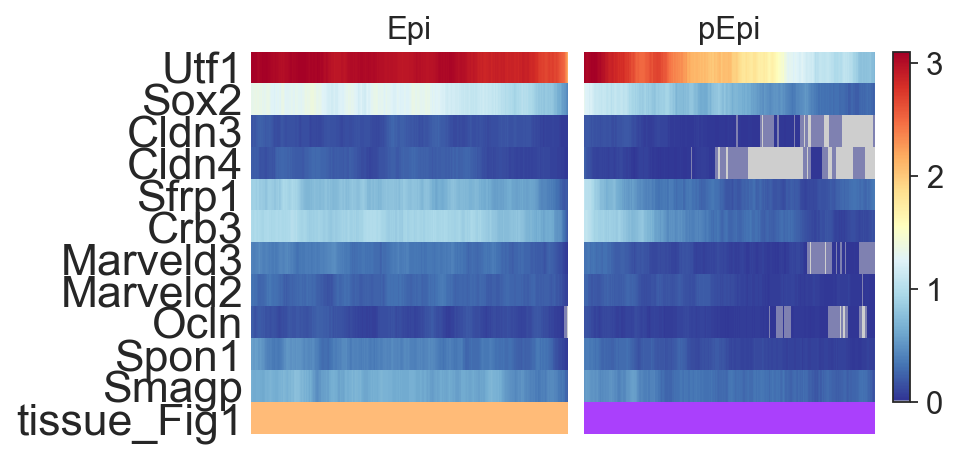

In [48]:
paths = [('Epi',['epiblast']),
        ('pEpi',['posterior epiblast'])    
    ]

path_ratios= pd.value_counts(adata.obs['tissue_Fig1']).values
path_cat = pd.value_counts(adata.obs['tissue_Fig1']).index
tmp=np.zeros(len(paths))
for ipath, (descr, path) in enumerate(paths):
    idx = np.flatnonzero(np.in1d(path_cat, path))
    tmp[ipath] = np.sum(path_ratios[idx]) #in case we use more than 
    
tmp = tmp.astype('int')
path_ratios = tmp / tmp.sum() *len(path_ratios)

_, axs = pl.subplots(ncols=len(tmp), figsize=(5, 3), 
                     gridspec_kw={'wspace': 0.05, 'left': 0.11,'width_ratios':path_ratios})
pl.subplots_adjust(left=0.05, right=0.98, top=0.88)
for ipath, (descr, path) in enumerate(paths):
    sc.pl.paga_path(adata, left_margin=0.3, ytick_fontsize=20, color_map=mymap,
                   nodes=path, ax=axs[ipath],
                   keys=genes_epi,
                   annotations=[],
                   color_maps_annotations={'FVF' : 'Greys'},
                   show_yticks=True if ipath==0 else False,
                   show_node_names = False,
                   show_colorbar=True if ipath==len(tmp)-1 else False,                        
                   n_avg=100, 
                   normalize_to_zero_one = False,
                   title='{}'.format(descr),
                   show=False)
pl.savefig('./figures/' + today + '_heatmap_epi_pEpi.pdf', dpi=150, bbox_inches='tight')
pl.show()

## Extended Data Figure 8 - Foxa2+ vs Foxa2- posterior epiblast

Define the genes of interest. Here, we use the results of the differential expression test of Foxa2+ and Foxa2- posterior epiblast.

In [45]:
low_Foxa2neg_epi_genes = ['Foxa2', 'Snai2', 'Dcpp1', 'Amica1', 'Noto', 'Pilrb2', 'Scel', 'Pilra',
       'Myof', 'Cer1', '4921506M07Rik', 'Pga5', 'Gm10000', 'Gm5475', 'Lefty1',
       'Foxg1', 'Srgn', 'Gsc', 'Ly6a', 'Afp', 'Samd3', 'Pkd1l1', 'Galnt15',
       'Spink1', 'Ttr', 'Pla2g12b', 'Npy', '9530026P05Rik', 'Ndrg1', 'Dcpp3',
       'Chrd', 'Sox17', 'Gm6116', 'Mlana', 'Gm11992', 'Adamts9', 'Ucma',
       'Dnajb13', 'Sema7a', 'Foxj1', 'Sspo', 'Gprc5a', 'Ang', 'Thpo',
       'Cyp26a1', 'Lhx1', 'Upp1', 'Them5', 'Apob', 'Pxdc1', 'Apom', 'Prdm8',
       'Fam19a4', 'Islr2', 'Gm11549', 'Prss1', 'Krt42', 'Plxna2', 'Bmp7',
       'Lhx1os', 'Plaur', 'Adgrg1', 'Mctp2', 'Hhex', 'Dennd2c', 'Lzts1',
       'Epha2', 'Rnase4', 'Samd5', 'Pkdcc', 'Chrna9', 'Acnat1', 'Fzd8',
       'Lgals9', 'Adam19', 'Bmp2', 'Lgr5', 'Svopl', 'Hs3st6', 'Foxa1',
       'Gm17634', 'Rbm47', 'Ppp2r2b', 'Fgf5', 'Apoa1', 'Oprd1', 'Optc',
       'Rnf152', 'Cnr1', 'Mixl1', 'Optn', 'Dapk2', 'Tdgf1', 'Rgs16', 'Six2',
       'Dgkk', 'Sertad4', 'Rap1gap2', 'Trpv2', 'Hes1']

In [46]:
high_Foxa2neg_epi_genes = ['Tlx2', 'Gsx1', 'Pax3', 'Cdh6', 'Dlx6os1', 'Dlk2', 'Lingo3', 'Ubd',
       'Tac2', 'Cyp1a1', 'Slc32a1', 'Adamts17', 'Pitx3', 'Dlx5', 'Dlx6',
       'Dlx3', 'Gata3', 'Vsx1', 'Tal2', 'Hoxb3os', 'Lrrc7', 'Dkk4', 'Cdx2',
       'Hmx1', 'Elf5', 'Sgpp2', 'Neurog1', 'Sp9', 'Wnt6', 'Bmp8b', 'Prss35',
       'Msx2', 'Shtn1', 'C430039J16Rik', 'Ptchd1', 'Ptchd4', 'Gdf10', 'Podn',
       'Stk32a', 'R3hdml', 'Hoxb2', 'Hoxa1', 'Bmper', 'Epha10', 'Tacstd2',
       'RP23-316J6.4', 'Ascl2', 'Gabra5', 'Tmprss12', 'Hoxb4', 'Hoxb1',
       'Hotairm1', 'Hand1', 'Gfra3', 'Prrx1', '6330403A02Rik', 'Sh2d5',
       'Gm3336', 'S100a16', 'Hoxa2', 'Cdx4', 'Coch', '2510009E07Rik', 'Lhfpl5',
       'Gata2', 'Hes7', 'Notum', 'Scara3', 'Ccdc177', 'Agmat', 'Cxcl14',
       'Tbx3', 'Alx1', 'Slc45a3', 'Dync1i1', 'Tfap2a', 'Pak6', 'Gbx2', 'Pdx1',
       'Plpp4', 'Gadd45g', 'Nkx1-2', 'Hes3', 'Hes5', 'Gucy1a3', 'Scn9a',
       'Hoxa3', 'Tmem178', 'Rhbdl3', 'Tbx20', 'Nrp2', 'Wscd1', 'Hoxd1', 'Nefh',
       'Fgfr3', 'Zmat4', 'Ano5', 'Runx3', 'Insm1', 'Dlx2'] 

In [13]:
adata_tmp = adata[adata.obs['tissues_final']=='posterior epiblast'].copy()

/Users/maren.buettner/anaconda3/envs/scanpy1-6/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [14]:
adata_tmp.obs['tissue_Foxa2'].value_counts()

Foxa2- posterior epiblast    1599
Foxa2+ posterior epiblast     616
Name: tissue_Foxa2, dtype: int64

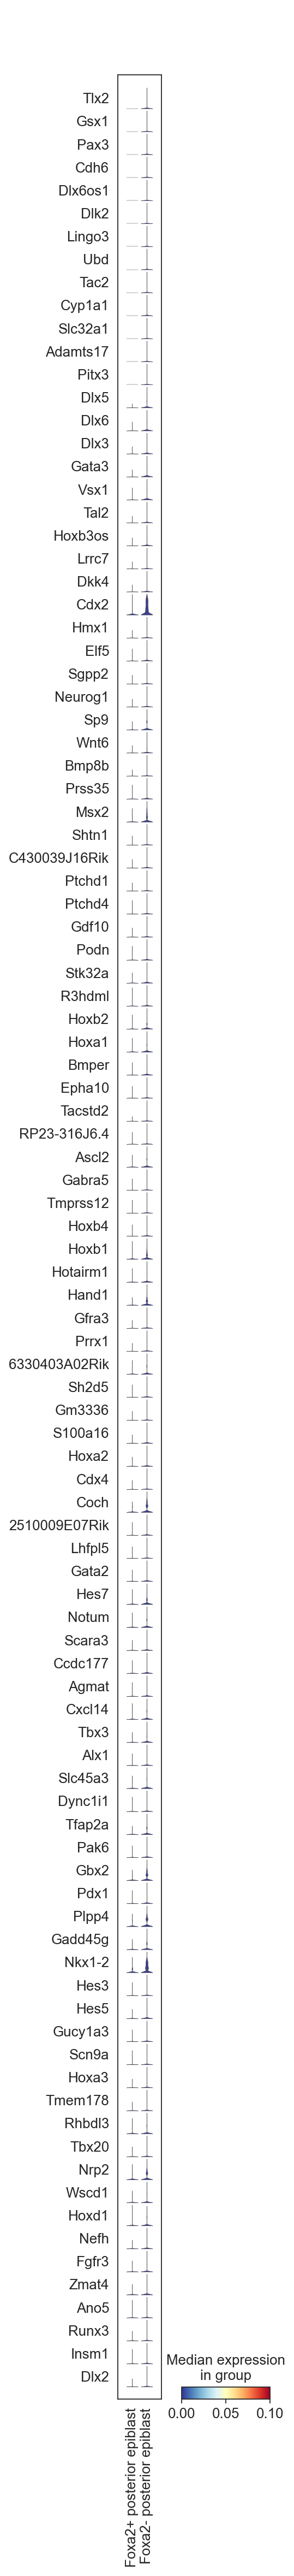

In [48]:
sc.pl.stacked_violin(adata_tmp, groupby='tissue_Foxa2', 
                     var_names=high_Foxa2neg_epi_genes, swap_axes=True, vmin=0, vmax=0.1, cmap='RdYlBu_r',
                     save=today + '_DE_genes_Foxa2pos-neg_pEpi_high-in-neg3.pdf'
                    )

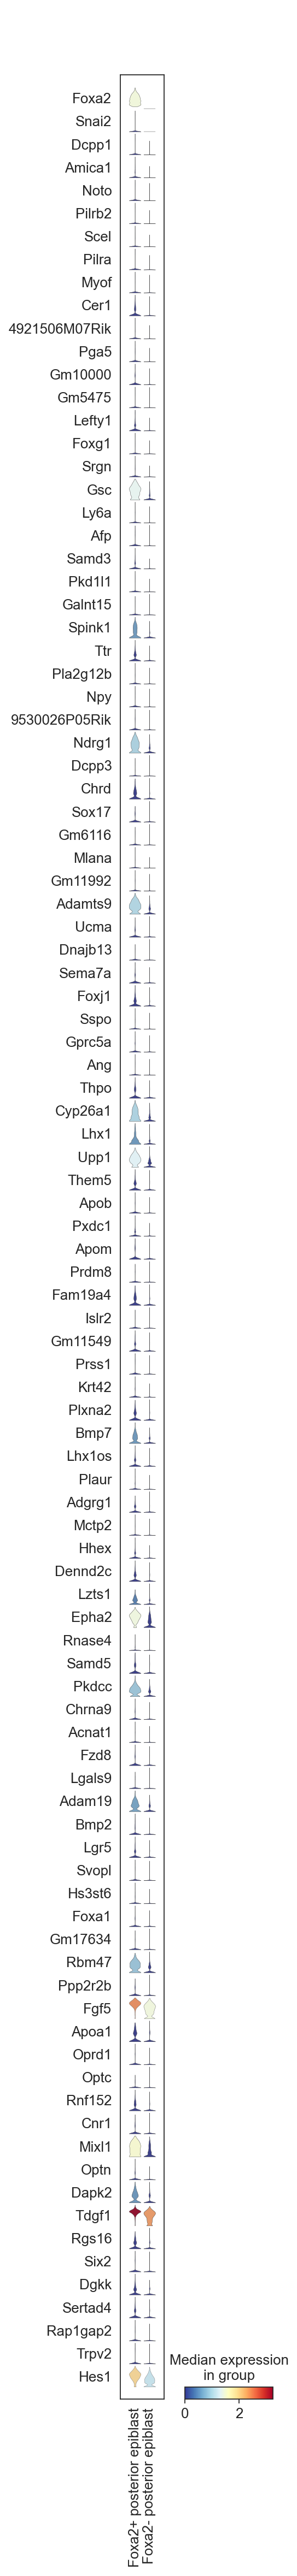

In [49]:
sc.pl.stacked_violin(adata_tmp, groupby='tissue_Foxa2', 
                     var_names=low_Foxa2neg_epi_genes, swap_axes=True, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_DE_genes_Foxa2pos-neg_pEpi_high-in-pos3.pdf'
                    )

Here we show another set of interesting genes.

In [36]:
genes_of_int =['Foxa2', #'T', 
               'Eomes','Mixl1', 'Fgf8', 'Tdgf1','Lhx1','Gsc',
    #'Cldn3','Cldn4',
               'Cldn6','Cldn7',# 'Cdh1',
               #'Tjp2', 'Tjp3','Ocln','Marveld2','Marveld3',
                 'Ezr', 'Slc9a3r1', #'Scrib', 
               'Crb3', 'Pard6b', 
                  'Adamts9','Adam19', 'Mmp14', 
                # 'Lamc1', 'Lamb1', 'Col4a1', 'Col4a2'
              ]

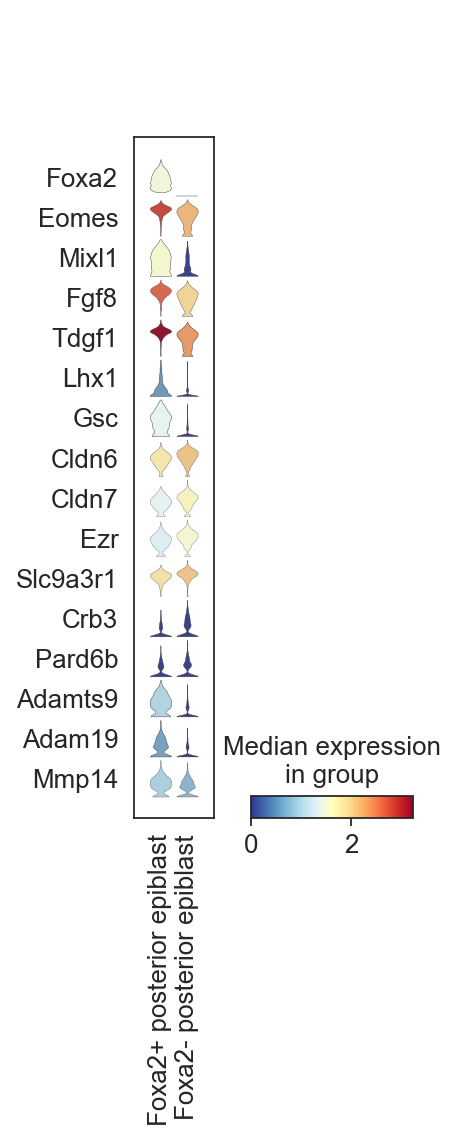

In [39]:
sc.pl.stacked_violin(adata_tmp, groupby='tissue_Foxa2', 
                     var_names=genes_of_int, swap_axes=True, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_pathway_genes_Foxa2pos-neg_pEpi2_woCdh1.pdf'
                    )

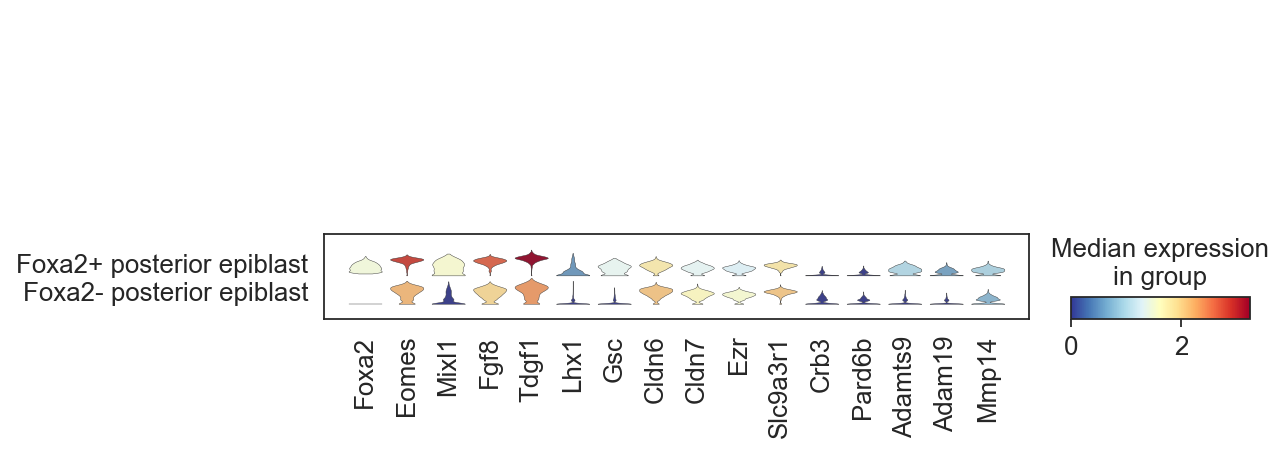

In [40]:
sc.pl.stacked_violin(adata_tmp, groupby='tissue_Foxa2', 
                     var_names=genes_of_int, swap_axes=False, vmin=0, 
                     #vmax=0.11, 
                     cmap='RdYlBu_r',
                     save=today + '_pathway_genes_Foxa2pos-neg_pEpi_woCdh1.pdf'
                    )

# Extended Data Figure 2 - Cluster annotation

In [22]:
markers = {}
markers['ectoderm']=['Gata3', 'Tfap2a', 'Dlx5']
markers['epiblast']=['Utf1', #epiblast
              'Otx2','Sox2','Pou3f1', # anterior epiblast
              'Tdgf1','Wnt3', 'Wnt8a' # posterior epiblast
        ]
markers['mesoderm']=['Pdgfra', 'Mesp1',
                    'Pifo','Foxj1', #axial mesoderm
                     'Tbx1', 'Meox1', 'Tcf15',#paraxial mesoderm
                     'Osr1', 'Pax2', 'Pax8', 'Lhx1', #intermediate mesoderm
                     'T', 
                     'Etv2', 'Tal1' #nascent endothelium
                    ]

markers['transitory progenitors'] =[
'Pax7',   
'Pga5',
'Srgn', 

'Cer1']
markers['endoderm']=[
         'Foxa2',
         'Sox17','Lefty1','Hhex','Krt18', #endoderm 
        ]

markers['Extraembryonic'] = ['Gm9','Rhox1','Elf5', #extraembryonic ectoderm
         'Afp','Apoa4','S100g' #extraembryonic endoderm
              ]

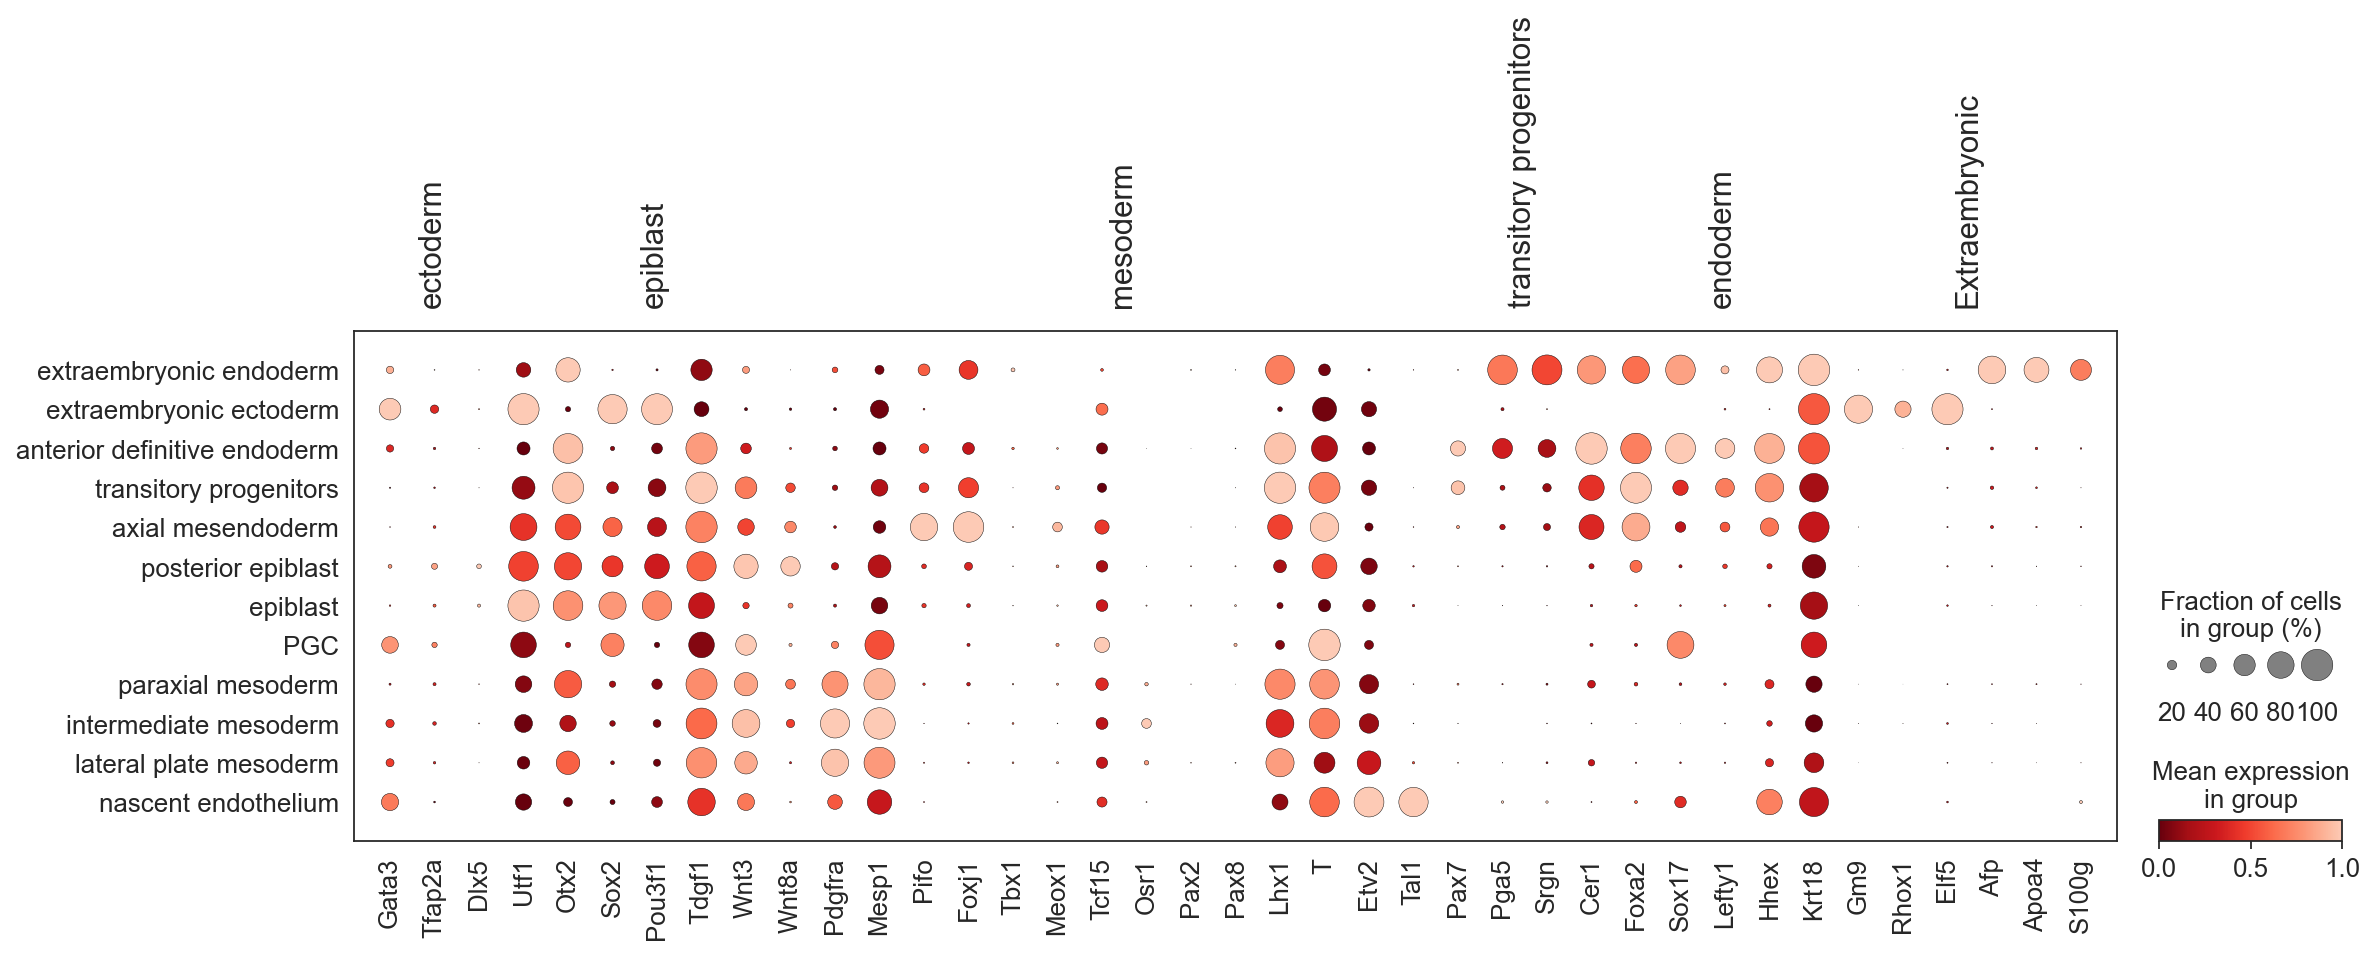

In [23]:
sc.pl.dotplot(adata, groupby='tissues_final', var_names=markers, use_raw=True, 
              color_map=myreds, standard_scale='var', mean_only_expressed=True,
              save=today + '_tissue_gene_expression.pdf')

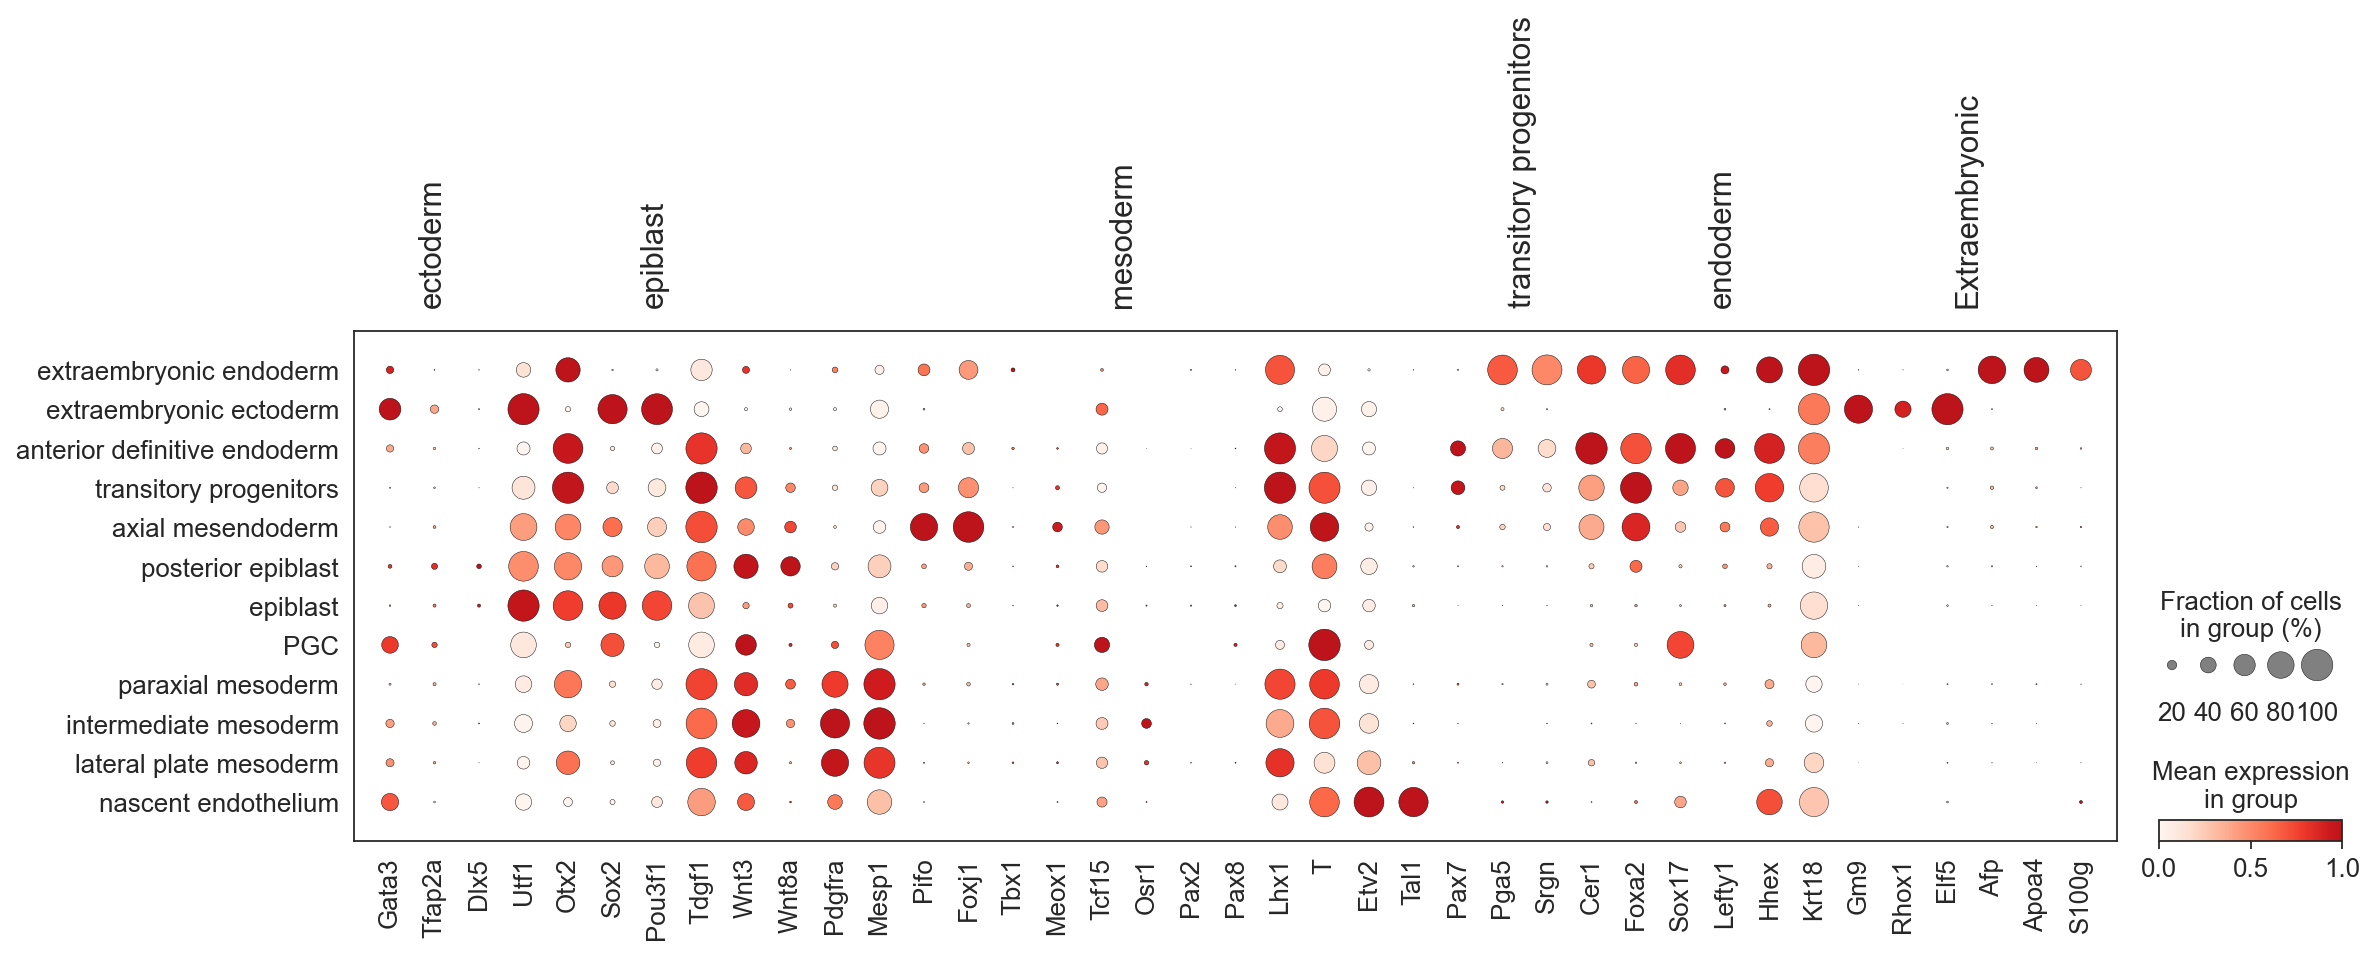

In [24]:
sc.pl.dotplot(adata, groupby='tissues_final', var_names=markers, use_raw=True, 
              color_map=myreds2, standard_scale='var', mean_only_expressed=True,
              save=today + '_tissue_gene_expression2.pdf')

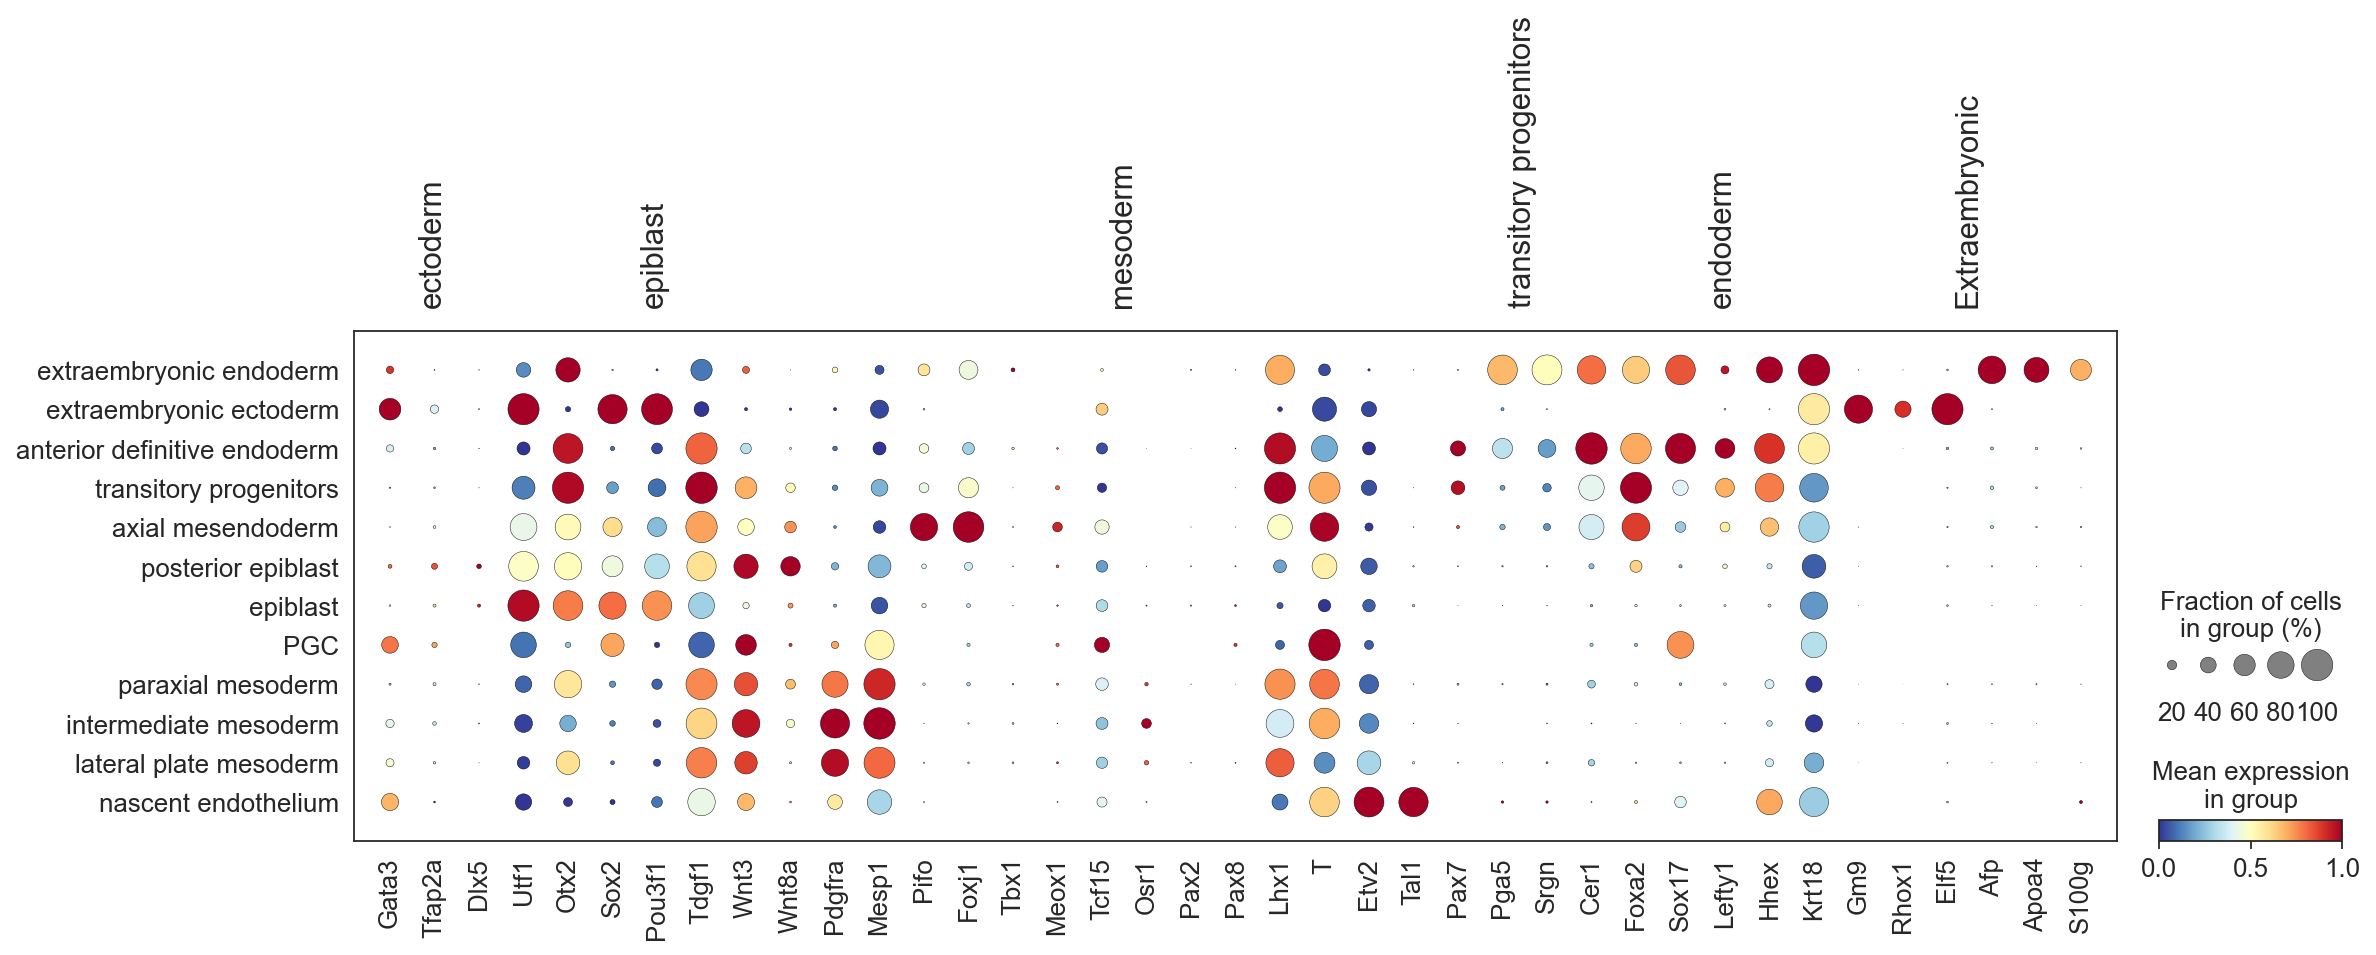

In [25]:
sc.pl.dotplot(adata, groupby='tissues_final', var_names=markers, use_raw=True, 
              color_map='RdYlBu_r', standard_scale='var', mean_only_expressed=True,
              save=today + '_tissue_gene_expression3.pdf')

Plot selected marker gene expression on UMAP. This reproduces `Extended Data Figure 2g`.

In [1]:
genes_oi = ['Cdh1', 'Cdh2', 'Snai1', 'T', 'Foxa2']

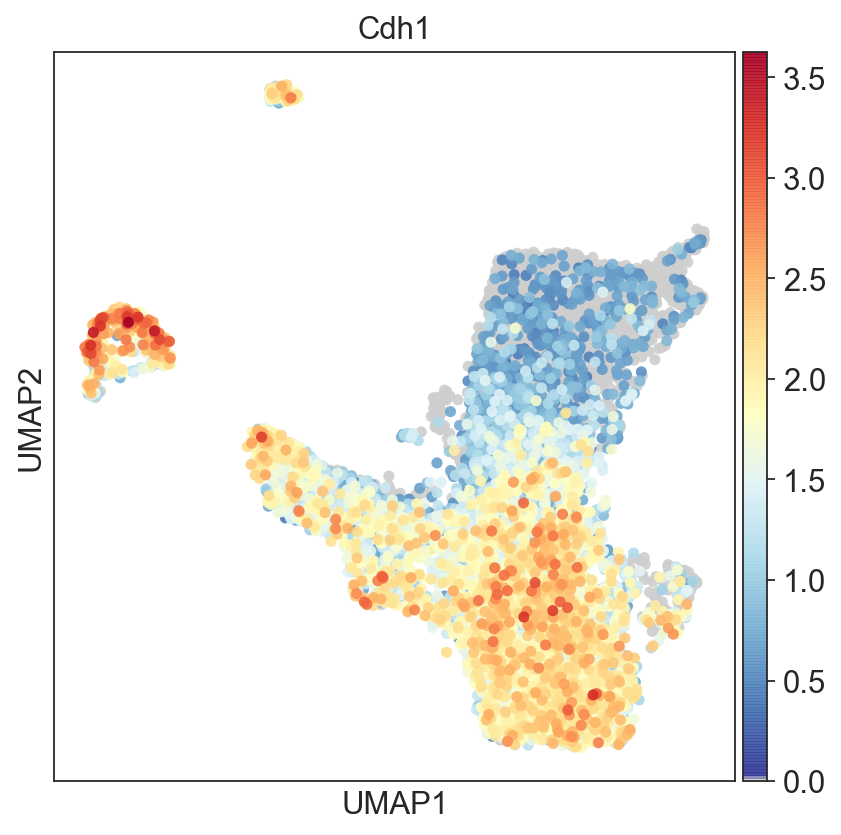

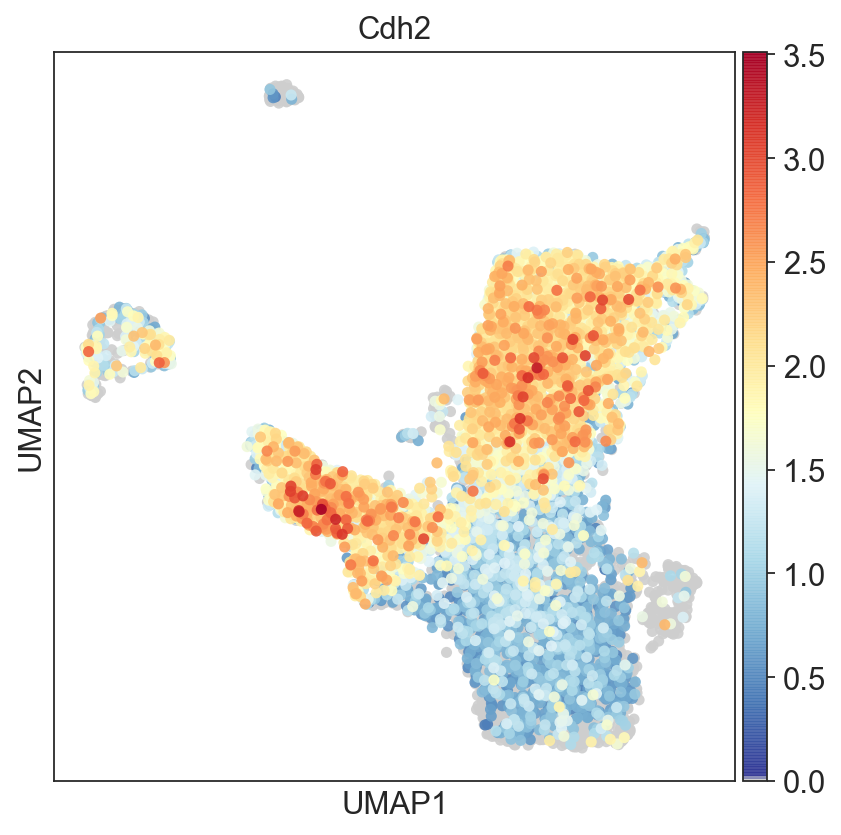

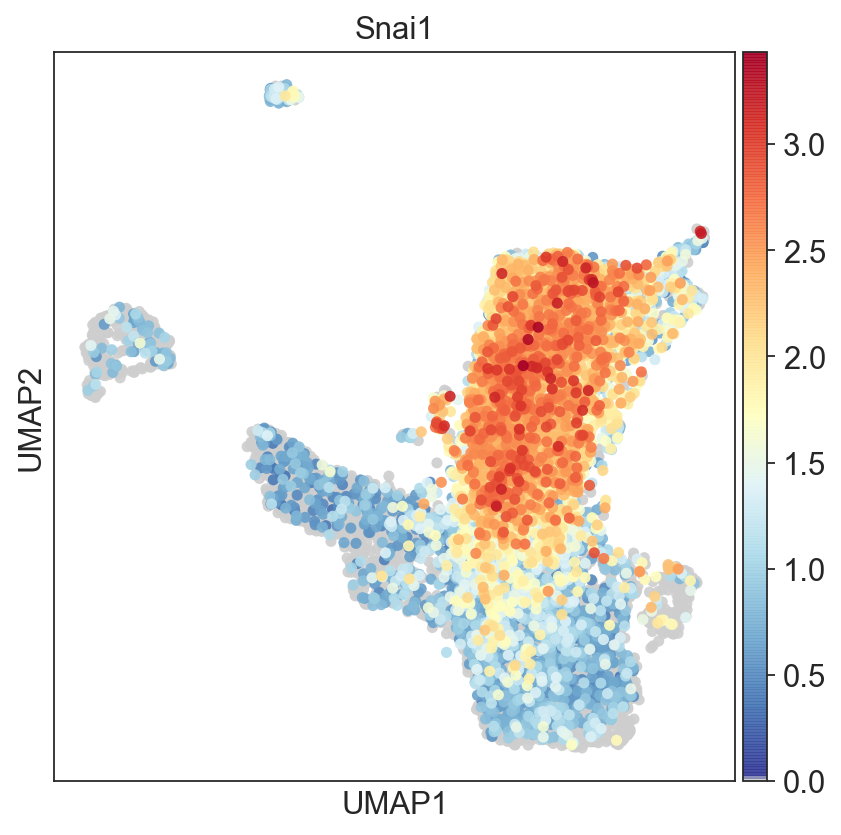

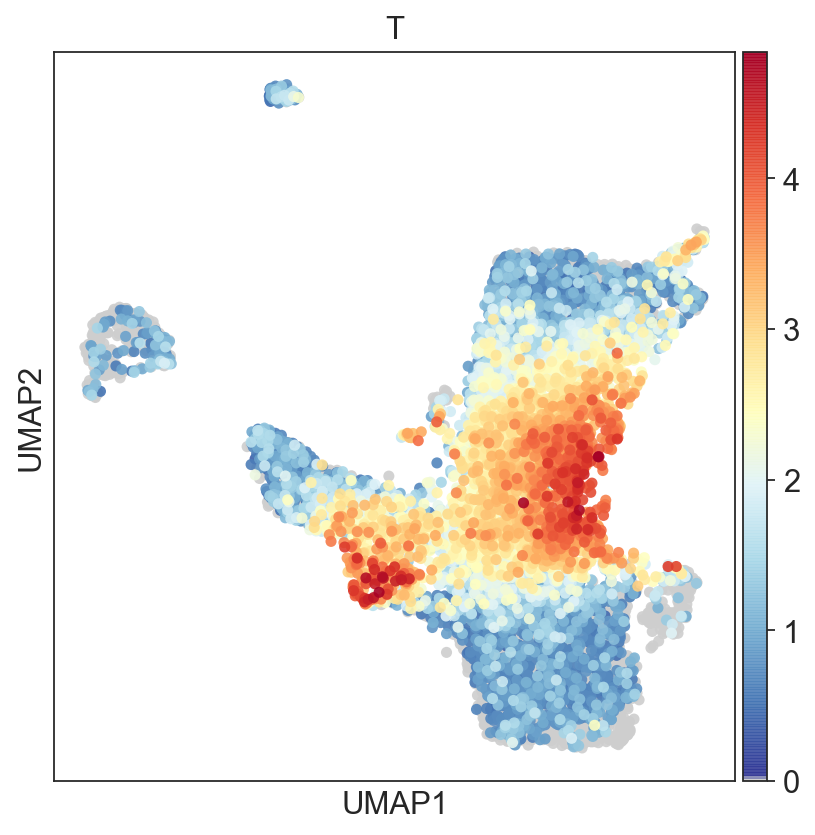

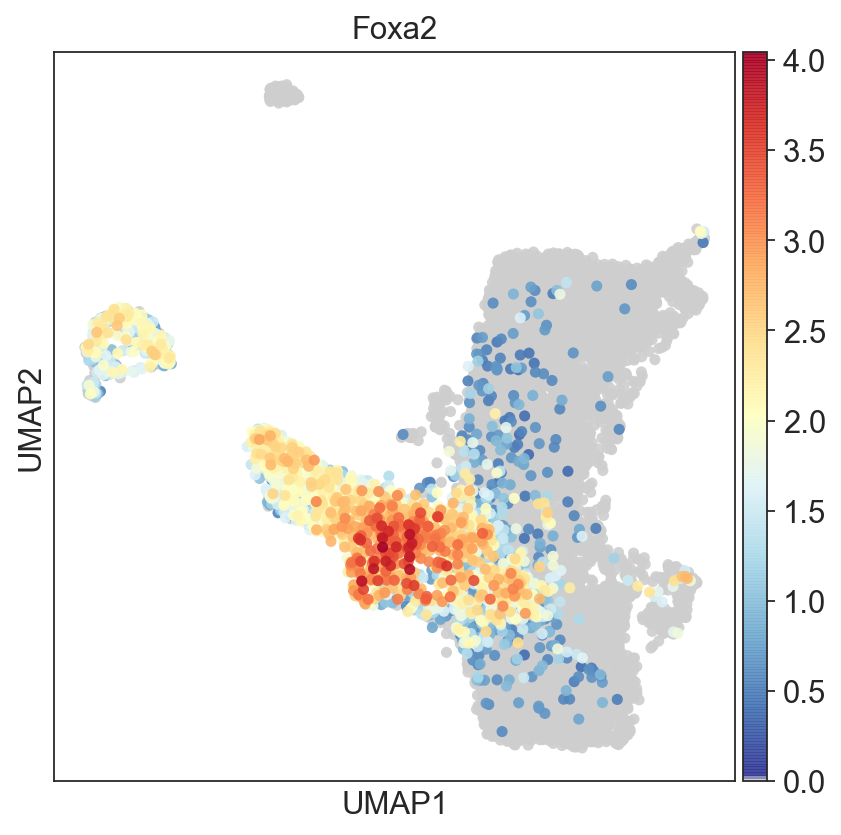

In [14]:
rcParams['figure.figsize']=(6,6)
for gene in genes_oi:
    sc.pl.umap(adata, color=gene,  use_raw=True,
               color_map=mymap,
               size=100,alpha=0.9, 
               save= '_' + gene + '.pdf')